<a href="https://colab.research.google.com/github/juansraigosoi-ecci/bici-al-trabajo-2026/blob/main/Semana4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

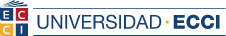
# **SISTEMAS AVANZADOS DE PRODUCCI√ìN CON PYTHON**

# **Taller 2 (2h): Fundamentos de Inferencia Estad√≠stica e Introducci√≥n al Modelado**

**Objetivos de la sesi√≥n**

- Comprender y aplicar conceptos estad√≠sticos fundamentales, incluyendo la distribuci√≥n normal, la varianza, la covarianza y la correlaci√≥n para describir datos y sus relaciones. üìä

- Implementar t√©cnicas de inferencia estad√≠stica para sacar conclusiones sobre una poblaci√≥n a partir de una muestra, utilizando el Teorema del L√≠mite Central y el bootstrapping.

- Formular y ejecutar tests de hip√≥tesis, interpretando correctamente el p-valor y comprendiendo la diferencia entre los errores de Tipo I y Tipo II.

- Ajustar modelos de regresi√≥n lineal utilizando los enfoques frecuentista (M√≠nimos Cuadrados Ordinarios) y bayesiano, entendiendo la intuici√≥n detr√°s de cada m√©todo.

 -Diagnosticar y evaluar la calidad de un modelo de regresi√≥n, analizando los residuos, identificando puntos influyentes y utilizando m√©tricas clave como el R¬≤. üìà




# **Secci√≥n 1: Fundamentos de Inferencia Estad√≠stica**
En esta secci√≥n vamos a aprender los conceptos b√°sicos de inferencia estad√≠stica de una manera super sencilla.

- ¬øQu√© es la inferencia estad√≠stica?

  Imagina que quieres saber qu√© piensan TODOS los clientes de una tienda online, pero preguntarles a todos ser√≠a imposible (son miles!). La inferencia estad√≠stica nos permite sacar conclusiones sobre TODA la poblaci√≥n estudiando solo una peque√±a PARTE (una muestra).

- Dataset que usaremos: Brazilian E-Commerce (Olist)

**Vamos a trabajar con datos reales de e-commerce de Brasil. Este dataset contiene informaci√≥n sobre:**

  1. Pedidos de clientes

  2. Productos vendidos

  3. Rese√±as de clientes

  4. Datos de ubicaci√≥n

  Los datos se pueden descargar del drive y cargar directamente:

  https://drive.google.com/drive/folders/1bUDf7L95lTN_AiuBHeKCcZlSyZbhX5E0?usp=sharing
  


In [ ]:
# 1) Subir datos desde Drive e importar librerias

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from datetime import datetime
from google.colab import drive





drive.mount('/content/drive')
# Buscamos la ruta del archivo en drive
base = '/content/drive/MyDrive/Colab Notebooks/DatosTaller2/'
orders    = pd.read_csv(base+"olist_orders_dataset.csv",
                        parse_dates=["order_purchase_timestamp","order_approved_at",
                                     "order_delivered_carrier_date","order_delivered_customer_date",
                                     "order_estimated_delivery_date"])
# Asi vamos a llamar a cada una de las listas
items     = pd.read_csv(base+"olist_order_items_dataset.csv", parse_dates=["shipping_limit_date"])
customers = pd.read_csv(base+"olist_customers_dataset.csv")
products  = pd.read_csv(base+"olist_products_dataset.csv")
sellers   = pd.read_csv(base+"olist_sellers_dataset.csv")
payments  = pd.read_csv(base+"olist_order_payments_dataset.csv")
reviews   = pd.read_csv(base+"olist_order_reviews_dataset.csv",
                        parse_dates=["review_creation_date","review_answer_timestamp"])
geoloc    = pd.read_csv(base+"olist_geolocation_dataset.csv")

#Un diccionario que recorra todas las tablas y sus tama√±os:
{t: df.shape for t,df in {
    "orders":orders, "items":items, "customers":customers, "products":products,
    "sellers":sellers, "payments":payments, "reviews":reviews, "geolocation":geoloc}.items()}



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


{'orders': (99441, 8),
 'items': (112650, 7),
 'customers': (99441, 5),
 'products': (32951, 9),
 'sellers': (3095, 4),
 'payments': (103886, 5),
 'reviews': (99224, 7),
 'geolocation': (1000163, 5)}

In [ ]:
#Un diccionario que recorra todas las tablas y el tipo de dato de cada columna
{t: df.dtypes for t,df in {
    "orders":orders, "items":items, "customers":customers, "products":products,
    "sellers":sellers, "payments":payments, "reviews":reviews, "geolocation":geoloc}.items()}

{'orders': order_id                                 object
 customer_id                              object
 order_status                             object
 order_purchase_timestamp         datetime64[ns]
 order_approved_at                datetime64[ns]
 order_delivered_carrier_date     datetime64[ns]
 order_delivered_customer_date    datetime64[ns]
 order_estimated_delivery_date    datetime64[ns]
 dtype: object,
 'items': order_id                       object
 order_item_id                   int64
 product_id                     object
 seller_id                      object
 shipping_limit_date    datetime64[ns]
 price                         float64
 freight_value                 float64
 dtype: object,
 'customers': customer_id                 object
 customer_unique_id          object
 customer_zip_code_prefix     int64
 customer_city               object
 customer_state              object
 dtype: object,
 'products': product_id                     object
 product_category_name  

## **1.1 Variables Aleatorias y Distribuciones**

Esta subsecci√≥n explora los conceptos de variables aleatorias y distribuciones de probabilidad, dedicando una atenci√≥n especial a la distribuci√≥n Normal.

### **1.1.1 ¬øQu√© es una variable aleatoria?**


**Definici√≥n (breve).**
Una **variable aleatoria** $X$ es una funci√≥n que asigna a cada resultado de un experimento aleatorio un n√∫mero real.

**Interpretaci√≥n en datos (ejemplo con productos).**
Si el ‚Äúexperimento‚Äù es **elegir un producto al azar del cat√°logo**, entonces:

* $W =$ *peso del producto en gramos* es una **variable aleatoria continua** (toma valores en $\mathbb{R}^+$).
* Cada valor observado $w_i$ en el CSV es una **realizaci√≥n** de $W$.
* La **distribuci√≥n** de $W$ describe qu√© pesos son m√°s o menos probables en el cat√°logo.

> **Nota.** Si quisieras una variable aleatoria **discreta**, podr√≠as usar `product_photos_qty` (n√∫mero de fotos).


Los datos faltantes son:2
n = 32778
Media (‚âà E[W]): 2135.7363780584537
Varianza (‚âà Var[W]): 14504153.76236459
Desviaci√≥n est√°ndar: 3808.431929595774

5 pesos tomados al azar (realizaciones de W):
[ 100. 1350.  700. 1475.  100.]


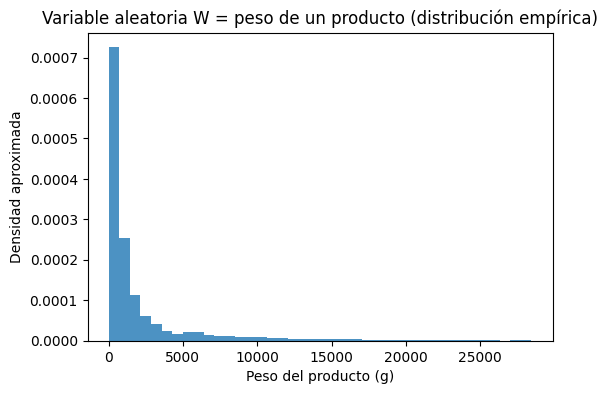

In [ ]:
# --- Reportamos los valores faltantes ---

print("Los datos faltantes son:" + str(products['product_weight_g'].isna().sum()))

# --- Seleccionamos la columna y limpiamos valores faltantes ---
W = products['product_weight_g'].dropna()

# (Opcional) Filtrar valores no positivos o extremos para visualizar mejor
W = W[(W > 0) & (W < W.quantile(0.995))]

# --- Estad√≠sticos b√°sicos: estas son estimaciones de E[W] y Var(W) a partir de la muestra ---
print("n =", W.shape[0])
print("Media (‚âà E[W]):", W.mean())
print("Varianza (‚âà Var[W]):", W.var(ddof=1))
print("Desviaci√≥n est√°ndar:", W.std(ddof=1))

# --- Experimento aleatorio: tomar productos al azar y ver sus pesos (realizaciones de W) ---
muestra = W.sample(5, replace=True, random_state=42)
print("\n5 pesos tomados al azar (realizaciones de W):")
print(muestra.values)

# --- Distribuci√≥n emp√≠rica (histograma como aproximaci√≥n de la densidad) ---
plt.figure(figsize=(6,4))
plt.hist(W, bins=40, density=True, alpha=0.8)
plt.xlabel("Peso del producto (g)")
plt.ylabel("Densidad aproximada")
plt.title("Variable aleatoria W = peso de un producto (distribuci√≥n emp√≠rica)")
plt.show()


Qu√© ilustra el c√≥digo:

*   W representa la variable aleatoria ‚Äúpeso de un producto‚Äù.

*   W.sample(5) simula cinco resultados del experimento ‚Äúelegir un producto al azar‚Äù.

*   mean/var/std son estimaciones muestrales de los par√°metros de la distribuci√≥n de
W.

*   El histograma es una aproximaci√≥n emp√≠rica de la distribuci√≥n de probabilidad de
W.

### **1.1.2 Media, Varianza y Desviaci√≥n Est√°ndar**

# **1.1.2 Media, Varianza y Desviaci√≥n Est√°ndar Muestrales**

## Contexto

Sea $W$ la variable aleatoria continua "peso del producto (g)". Cada registro del CSV entrega una realizaci√≥n $w_i$ de $W$.

## Objetivo

Estimar los par√°metros centrales de $W$ a partir de una muestra $\{w_1, \dots, w_n\}$.

## Definiciones (muestrales)

**Media (promedio):**
$$
\bar{w} = \frac{1}{n} \sum_{i=1}^{n} w_i
$$

**Varianza muestral (dispersi√≥n alrededor de la media):**
$$
s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (w_i - \bar{w})^2
$$

**Desviaci√≥n est√°ndar:**
$$
s = \sqrt{s^2}
$$

## Notas clave

- En pandas, `var()` y `std()` usan por defecto `ddof=1` (varianza muestral).
- Si modelas a la poblaci√≥n completa, usar√≠as `ddof=0` (varianza "poblacional").
- Unidades: si $W$ est√° en gramos, $\bar{w}$ est√° en gramos; $s^2$ en $g^2$; $s$ en gramos.

n = 32,945
Media (‚âà E[W])            : 2,276.75 g
Varianza muestral (ddof=1): 18,337,452.69 g^2
Desv. est√°ndar muestral   : 4,282.23 g
(Poblacional) Var ddof=0  : 18,336,896.09 g^2
(Poblacional) Std ddof=0  : 4,282.16 g

¬øVarianza manual coincide con pandas (muestral)? True

5 pesos tomados al azar (realizaciones de W):
[  150.  3300.  3050. 14350.  2375.]


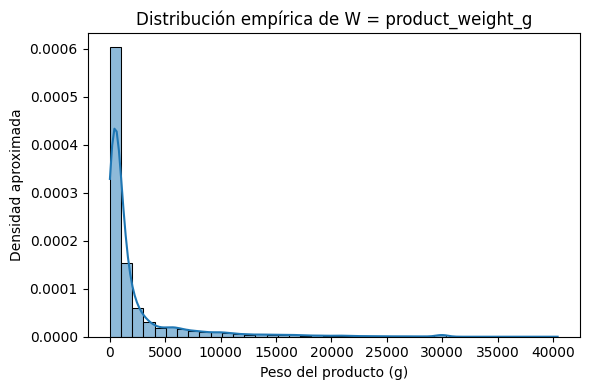


Comparaci√≥n con recorte 1%-99% (solo diagn√≥stico, no reemplaza la definici√≥n cl√°sica):
Media cl√°sica : 2,276.75 g   |  Media recortada : 2,041.35 g
Std cl√°sica   : 4,282.23 g |  Std recortada   : 3,464.79 g


In [ ]:
# 1) Seleccionar y limpiar la variable
W = products['product_weight_g'].dropna().astype(float)
W = W[W > 0]  # descartamos pesos no positivos si existen

n = W.shape[0]
print(f"n = {n:,}")

# 2) Estad√≠sticos muestrales (ddof=1)
mean_w = W.mean()
var_w_sample = W.var(ddof=1)   # varianza muestral
std_w_sample = W.std(ddof=1)   # desviaci√≥n muestral

# 3) (Referencia) Estad√≠sticos poblacionales (ddof=0)
var_w_pop = W.var(ddof=0)
std_w_pop = W.std(ddof=0)

print(f"Media (‚âà E[W])            : {mean_w:,.2f} g")
print(f"Varianza muestral (ddof=1): {var_w_sample:,.2f} g^2")
print(f"Desv. est√°ndar muestral   : {std_w_sample:,.2f} g")
print(f"(Poblacional) Var ddof=0  : {var_w_pop:,.2f} g^2")
print(f"(Poblacional) Std ddof=0  : {std_w_pop:,.2f} g")

# 4) Verificaci√≥n manual de s^2 = sum((w_i - wÃÑ)^2)/(n-1)
var_manual = ((W - mean_w)**2).sum() / (n - 1)
print("\n¬øVarianza manual coincide con pandas (muestral)?", np.isclose(var_manual, var_w_sample))

# 5) Muestra aleatoria: realizaciones de W
print("\n5 pesos tomados al azar (realizaciones de W):")
print(W.sample(5, replace=True, random_state=123).values)

# 6) Visualizaci√≥n r√°pida (distribuci√≥n emp√≠rica)
plt.figure(figsize=(6,4))
sns.histplot(W, bins=40, stat='density', kde=True)
plt.xlabel("Peso del producto (g)")
plt.ylabel("Densidad aproximada")
plt.title("Distribuci√≥n emp√≠rica de W = product_weight_g")
plt.tight_layout()
plt.show()

# 7) (Opcional) Comparar con una versi√≥n 'recortada' para ver sensibilidad a at√≠picos
W_trim = W[W.between(W.quantile(0.01), W.quantile(0.99))]
print("\nComparaci√≥n con recorte 1%-99% (solo diagn√≥stico, no reemplaza la definici√≥n cl√°sica):")
print(f"Media cl√°sica : {mean_w:,.2f} g   |  Media recortada : {W_trim.mean():,.2f} g")
print(f"Std cl√°sica   : {std_w_sample:,.2f} g |  Std recortada   : {W_trim.std(ddof=1):,.2f} g")


### **1.1.3 La Distribuci√≥n de Probabilidad Normal (Gaussiana)**

# **1.1.3 La Distribuci√≥n de Probabilidad Normal (Gaussiana)**

## Definici√≥n

Una variable aleatoria $X$ tiene distribuci√≥n normal con media $\mu$ y varianza $\sigma^2$ si su funci√≥n de densidad es:

$$
f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right), \quad x \in \mathbb{R}.
$$

Se escribe $X \sim N(\mu, \sigma^2)$. Es sim√©trica alrededor de $\mu$, unimodal y presenta colas ligeras.

## Estimaci√≥n de par√°metros (MLE)

Dados datos $x_1, \dots, x_n$, los estimadores de m√°xima verosimilitud son:

$$
\hat{\mu} = \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i, \quad \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2.
$$

(En pandas, esto corresponde a `mean()` y `std(ddof=0)`.)

## Cu√°ndo es razonable asumir Normalidad

- La variable es continua, aproximadamente sim√©trica y sin colas pesadas.
- El histograma y el QQ-plot se ajustan bien a una curva normal.
- Las pruebas de normalidad no rechazan la hip√≥tesis (con cautela: con muestras muy grandes, peque√±as desviaciones dar√°n p-valores muy peque√±os).

## En datos reales (ej. pesos de productos)

`product_weight_g` suele ser asim√©trica/mezcla por categor√≠as; una transformaci√≥n logar√≠tmica puede acercar la forma a una normal: $Y = \log(W)$.

## Estrategia pr√°ctica de evaluaci√≥n

- **Visual**: histograma + curva normal ajustada.
- **QQ-plot** (comparar cuantiles emp√≠ricos vs te√≥ricos).
- **Pruebas de normalidad** (p. ej. D'Agostino $K^2$, Anderson‚ÄìDarling) + skewness/kurtosis.
- Repetir sobre $\log(W)$ y comparar.

n = 32,945 observaciones
ŒºÃÇ (mean)  = 2,276.75 g
œÉÃÇ (std)   = 4,282.16 g


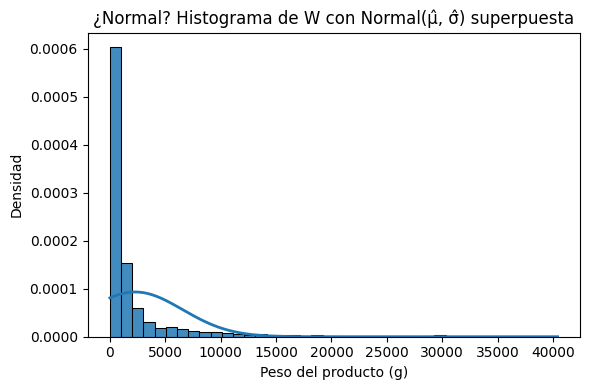

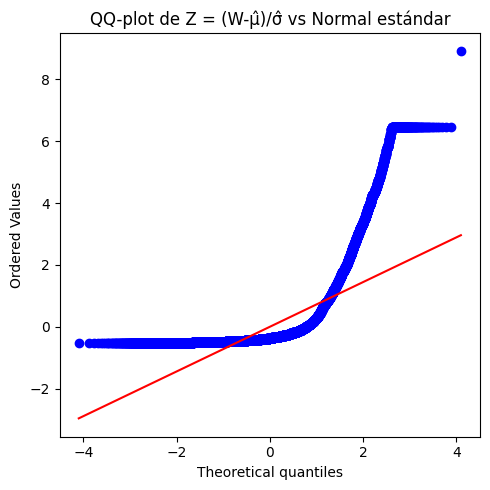


=== D‚ÄôAgostino K^2 ===
Estad√≠stico: 24,666.977 | p-valor: 0.000e+00 (H0: normalidad)

=== Momentos ===
Asimetr√≠a (skew): 3.605  (0 en Normal)
Curtosis (Fisher): 15.132  (0 en Normal)

=== Anderson‚ÄìDarling ===
Estad√≠stico A^2: 5,457.493
  Nivel 15%  ‚Üí  cr√≠tico = 0.576  ‚Üí  RECHAZA H0
  Nivel 10%  ‚Üí  cr√≠tico = 0.656  ‚Üí  RECHAZA H0
  Nivel 5%  ‚Üí  cr√≠tico = 0.787  ‚Üí  RECHAZA H0
  Nivel 2%  ‚Üí  cr√≠tico = 0.918  ‚Üí  RECHAZA H0
  Nivel 1%  ‚Üí  cr√≠tico = 1.092  ‚Üí  RECHAZA H0


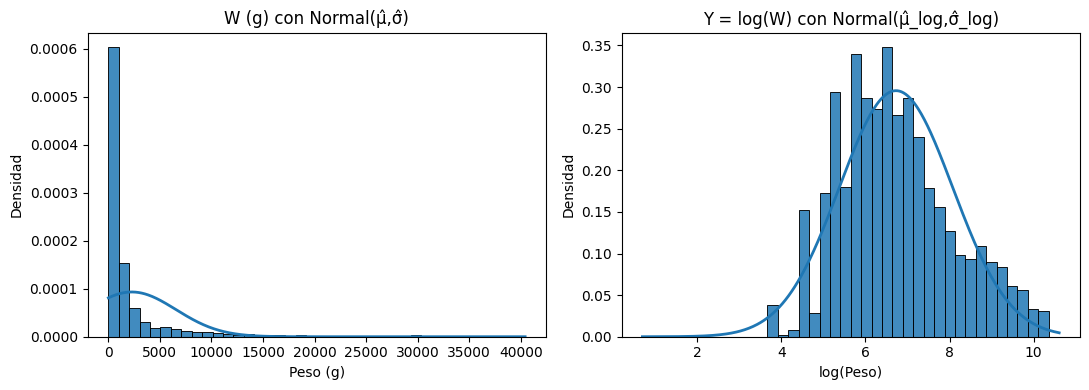

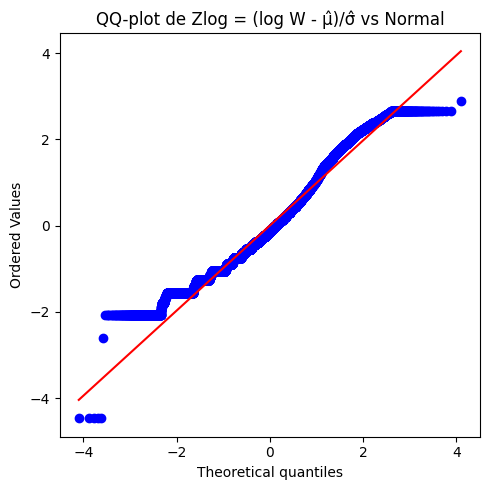


=== D‚ÄôAgostino K^2 en log(W) ===
Estad√≠stico: 1,241.511 | p-valor: 2.566e-270

Interpretaci√≥n sugerida:
- Si el histograma y QQ-plot de W muestran cola derecha marcada y p-valor peque√±o, la Normal NO es buen modelo para W.
- Si log(W) se ve m√°s lineal en el QQ-plot y el ajuste visual mejora, un modelo log-normal puede ser m√°s razonable.
- Con n muy grande, p-valores tienden a ser muy peque√±os incluso por desviaciones leves; revisa tambi√©n skew/kurtosis y los gr√°ficos.


In [ ]:
# === 1) Preparaci√≥n de los datos ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Tomamos la variable de inter√©s: W = peso del producto (g)
W = products['product_weight_g'].dropna().astype(float)
W = W[W > 0]  # descartamos pesos no positivos si hubiera

n = W.shape[0]
print(f"n = {n:,} observaciones")

# === 2) Estimaci√≥n de par√°metros (MLE) para Normal ===
mu_hat = W.mean()
sigma_hat = W.std(ddof=0)  # ddof=0 para MLE poblacional
print(f"ŒºÃÇ (mean)  = {mu_hat:,.2f} g")
print(f"œÉÃÇ (std)   = {sigma_hat:,.2f} g")

# === 3) Visual: Histograma + curva Normal ajustada ===
x = np.linspace(W.min(), W.max(), 400)
pdf = stats.norm.pdf(x, loc=mu_hat, scale=sigma_hat)

plt.figure(figsize=(6,4))
sns.histplot(W, bins=40, stat='density', alpha=0.85)
plt.plot(x, pdf, linewidth=2)
plt.xlabel("Peso del producto (g)")
plt.ylabel("Densidad")
plt.title("¬øNormal? Histograma de W con Normal(ŒºÃÇ, œÉÃÇ) superpuesta")
plt.tight_layout()
plt.show()

# === 4) QQ-plot (estandarizado) ===
Z = (W - mu_hat) / sigma_hat  # estandarizamos con MLE
plt.figure(figsize=(5,5))
stats.probplot(Z, dist="norm", plot=plt)
plt.title("QQ-plot de Z = (W-ŒºÃÇ)/œÉÃÇ vs Normal est√°ndar")
plt.tight_layout()
plt.show()

# === 5) Pruebas de normalidad y momentos ===
# Con tama√±os muy grandes, las pruebas tienden a rechazar normalidad por cualquier peque√±a desviaci√≥n.
# Reportamos tambi√©n asimetr√≠a y curtosis para cuantificar el desv√≠o.
k2_stat, k2_p = stats.normaltest(W, nan_policy='omit')  # D‚ÄôAgostino K^2
skew = stats.skew(W, bias=False, nan_policy='omit')
kurt = stats.kurtosis(W, fisher=True, bias=False, nan_policy='omit')  # 0 ser√≠a normal
print("\n=== D‚ÄôAgostino K^2 ===")
print(f"Estad√≠stico: {k2_stat:,.3f} | p-valor: {k2_p:.3e} (H0: normalidad)")

print("\n=== Momentos ===")
print(f"Asimetr√≠a (skew): {skew:,.3f}  (0 en Normal)")
print(f"Curtosis (Fisher): {kurt:,.3f}  (0 en Normal)")

# Anderson‚ÄìDarling (devuelve niveles cr√≠ticos; no hay p-valor directo)
ad_res = stats.anderson(W, dist='norm')
print("\n=== Anderson‚ÄìDarling ===")
print(f"Estad√≠stico A^2: {ad_res.statistic:,.3f}")
for sl, cv in zip(ad_res.significance_level, ad_res.critical_values):
    print(f"  Nivel {sl:.0f}%  ‚Üí  cr√≠tico = {cv:.3f}  ‚Üí  {'RECHAZA H0' if ad_res.statistic > cv else 'NO rechaza H0'}")

# === 6) Diagn√≥stico alternativo: log-transformaci√≥n ===
Y = np.log(W)  # log natural
mu_log = Y.mean()
sigma_log = Y.std(ddof=0)

# Visual en log
x_log = np.linspace(Y.min(), Y.max(), 400)
pdf_log = stats.norm.pdf(x_log, loc=mu_log, scale=sigma_log)

fig, axes = plt.subplots(1, 2, figsize=(11,4))
sns.histplot(W, bins=40, stat='density', ax=axes[0], alpha=0.85)
axes[0].plot(x, pdf, linewidth=2)
axes[0].set_title("W (g) con Normal(ŒºÃÇ,œÉÃÇ)")
axes[0].set_xlabel("Peso (g)")
axes[0].set_ylabel("Densidad")

sns.histplot(Y, bins=40, stat='density', ax=axes[1], alpha=0.85)
axes[1].plot(x_log, pdf_log, linewidth=2)
axes[1].set_title("Y = log(W) con Normal(ŒºÃÇ_log,œÉÃÇ_log)")
axes[1].set_xlabel("log(Peso)")
axes[1].set_ylabel("Densidad")

plt.tight_layout()
plt.show()

# QQ-plot en log
Zlog = (Y - mu_log) / sigma_log
plt.figure(figsize=(5,5))
stats.probplot(Zlog, dist="norm", plot=plt)
plt.title("QQ-plot de Zlog = (log W - ŒºÃÇ)/œÉÃÇ vs Normal")
plt.tight_layout()
plt.show()

# Prueba en log
k2_stat_log, k2_p_log = stats.normaltest(Y, nan_policy='omit')
print("\n=== D‚ÄôAgostino K^2 en log(W) ===")
print(f"Estad√≠stico: {k2_stat_log:,.3f} | p-valor: {k2_p_log:.3e}")

print("\nInterpretaci√≥n sugerida:")
print("- Si el histograma y QQ-plot de W muestran cola derecha marcada y p-valor peque√±o, la Normal NO es buen modelo para W.")
print("- Si log(W) se ve m√°s lineal en el QQ-plot y el ajuste visual mejora, un modelo log-normal puede ser m√°s razonable.")
print("- Con n muy grande, p-valores tienden a ser muy peque√±os incluso por desviaciones leves; revisa tambi√©n skew/kurtosis y los gr√°ficos.")


#### **Intrepretaci√≥n de los resultados:**


## **Resumen Estad√≠stico**
- **Tama√±o muestral**: n = 32,945 observaciones (muestra muy grande)
- **Media (ŒºÃÇ)**: 2,276.75 g
- **Desviaci√≥n est√°ndar (œÉÃÇ)**: 4,282.16 g

## **An√°lisis de los Resultados**

### **1. Evidencia de No Normalidad en W**
- **Asimetr√≠a extrema**: 3.605 (muy superior a 0, esperado en normal)
  - Indica una distribuci√≥n con cola derecha muy larga
- **Curtosis elevada**: 15.132 (mucho mayor que 3, esperado en normal)
  - Indica colas pesadas y pico m√°s pronunciado
- **D'Agostino K¬≤**: Estad√≠stico enorme (24,666.977) con p-valor = 0.000
  - Rechazo contundente de la hip√≥tesis nula de normalidad
- **Anderson-Darling**: Estad√≠stico extremadamente alto (5,457.493)
  - Rechazo de H0 a todos los niveles de significancia (1%, 2%, 5%, 10%, 15%)

### **2. Interpretaci√≥n Pr√°ctica**
- La distribuci√≥n de pesos **no sigue una distribuci√≥n normal**
- La alta asimetr√≠a positiva (3.605) sugiere:
  - Muchos productos con pesos relativamente bajos
  - Algunos productos con pesos excepcionalmente altos (valores at√≠picos)
- La desviaci√≥n est√°ndar (4,282.16 g) es casi el doble que la media (2,276.75 g), lo que confirma la alta dispersi√≥n y presencia de valores extremos

### **3. Transformaci√≥n Logar√≠tmica**
- **D'Agostino en log(W)**: Aunque mejor√≥ (1,241.511 vs 24,666.977), el p-valor (2.566e-270) sigue indicando desviaci√≥n significativa de la normalidad
- La transformaci√≥n logar√≠tmica **mejora pero no corrige completamente** la no normalidad

## **Conclusi√≥n**
La variable de peso de productos **no se distribuye normalmente** y presenta:
- **Asimetr√≠a extrema** hacia valores altos
- **Colas pesadas** con valores at√≠picos
- **Alta dispersi√≥n** relativa

**Recomendaci√≥n**: Considerar an√°lisis no param√©tricos o modelar la distribuci√≥n real (posiblemente mixture models) en lugar de asumir normalidad. La transformaci√≥n logar√≠tmica ayuda pero no es suficiente para alcanzar normalidad.


## **1.2 Relaci√≥n entre Variables**

Para entender mejor la operaci√≥n, analizaremos c√≥mo se relacionan algunas de las variables m√°s importantes en cualquier negocio de e-commerce o log√≠stica. Usaremos la covarianza y la correlaci√≥n para responder a preguntas de negocio muy concretas.

1. Precio del Pedido vs. Costo del Flete (price ‚Üî freight_value)
Pregunta de negocio: ¬øLos pedidos de mayor valor tienden a pagar un flete m√°s caro? üßê

Hip√≥tesis: Podr√≠amos suponer que s√≠. Pedidos con un price m√°s elevado podr√≠an estar asociados a un freight_value mayor por varias razones: un seguro de env√≠o m√°s costoso, un empaque m√°s robusto, o simplemente porque los productos m√°s caros tienden a ser m√°s grandes o pesados. Analizaremos si existe una tendencia positiva entre estas dos variables.

2. Atributos F√≠sicos del Producto vs. Costo del Flete (product_weight_g / product_volume_cm3 ‚Üî freight_value)
Pregunta de negocio: ¬øEl peso y el volumen de un producto impactan directamente en el costo de su env√≠o? üì¶

Hip√≥tesis: Esta es la relaci√≥n m√°s fundamental en log√≠stica. Es casi seguro que a mayor peso (product_weight_g) o mayor volumen (calculado a partir de product_length_cm, product_height_cm, product_width_cm), el costo del flete (freight_value) ser√° mayor. Las empresas de paqueter√≠a basan sus tarifas directamente en estas m√©tricas. Nuestra meta ser√° cuantificar qu√© tan fuerte y directa es esta relaci√≥n.

In [ ]:
# Integrar items + products y crear variables √∫tiles para 1.2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Merge m√≠nimo a nivel de √≠tem: precio/flete + atributos del producto
ip = (items[['order_id','order_item_id','product_id','price','freight_value']]
      .merge(products[['product_id','product_weight_g','product_length_cm',
                       'product_height_cm','product_width_cm']],
             on='product_id', how='left'))

# Ensure relevant columns are numeric after merge
ip['price'] = pd.to_numeric(ip['price'], errors='coerce')
ip['freight_value'] = pd.to_numeric(ip['freight_value'], errors='coerce')
ip['product_weight_g'] = pd.to_numeric(ip['product_weight_g'], errors='coerce')
ip['product_length_cm'] = pd.to_numeric(ip['product_length_cm'], errors='coerce')
ip['product_height_cm'] = pd.to_numeric(ip['product_height_cm'], errors='coerce')
ip['product_width_cm'] = pd.to_numeric(ip['product_width_cm'], errors='coerce')


# Volume aproximado en cm^3 (caja m√≠nima)
ip['product_volume_cm3'] = (ip['product_length_cm'] * ip['product_height_cm'] * ip['product_width_cm'])

# Limpieza b√°sica (quitamos NA and valores no positivos/absurdos)
df_rel = ip.dropna(subset=['price','freight_value','product_weight_g','product_volume_cm3']).copy()
df_rel = df_rel[(df_rel['price']>0) & (df_rel['freight_value']>=0) &
                (df_rel['product_weight_g']>0) & (df_rel['product_volume_cm3']>0)]

# (Opcional) versi√≥n recortada al 1‚Äì99% para reducir at√≠picos extremos en gr√°ficos/correls
numeric_cols = ['price','freight_value','product_weight_g','product_volume_cm3']
Q1 = df_rel[numeric_cols].quantile(0.01)
Q99 = df_rel[numeric_cols].quantile(0.99)
mask = (df_rel[numeric_cols] >= Q1) & (df_rel[numeric_cols] <= Q99)

df_trim = df_rel[mask.all(axis=1)].copy()

df_rel.shape, df_trim.shape

((112624, 10), (106634, 10))

### **1.2.1 Covarianza: ¬øse mueven juntas?**

La **covarianza** entre dos variables $X$ e $Y$ mide c√≥mo var√≠an juntas:

$$
\operatorname{Cov}(X,Y) = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})
$$

### Signo

* **> 0**: Cuando $X$ est√° por encima de su media, $Y$ tiende a estar por encima de la suya (se mueven ‚Äúen la misma direcci√≥n‚Äù).
* **< 0**: Tienden a moverse en direcciones opuestas.
* **‚âà 0**: No hay una relaci√≥n lineal clara (aunque podr√≠a existir una relaci√≥n no lineal).

### Escala

La covarianza est√° en unidades combinadas (por ejemplo, ‚Äúpesos √ó flete‚Äù), por lo que no es directamente comparable entre diferentes pares de variables con escalas distintas.

### Ejemplos en Log√≠stica/Mercado

* **X = `price`**, **Y = `freight_value`**: Si la covarianza es > 0, en promedio, los pedidos m√°s caros tambi√©n pagan un flete m√°s alto.
* **X = `product_weight_g`**, **Y = `freight_value`**: Una covarianza positiva sugiere que los productos m√°s pesados tienden a tener un flete m√°s caro, lo cual es esperable debido a los costos de env√≠o.

---

En resumen, la covarianza nos dice si las variables ‚Äúse mueven juntas‚Äù, pero no qu√© tan fuerte es esa relaci√≥n debido a su dependencia de la escala. Para medir la fuerza, utilizamos la **correlaci√≥n**.

Covarianzas (sobre df_rel, sin recorte):
  price_vs_freight: 1,202.36
  weight_vs_freight: 36,202.79
  volume_vs_freight: 217,414.42


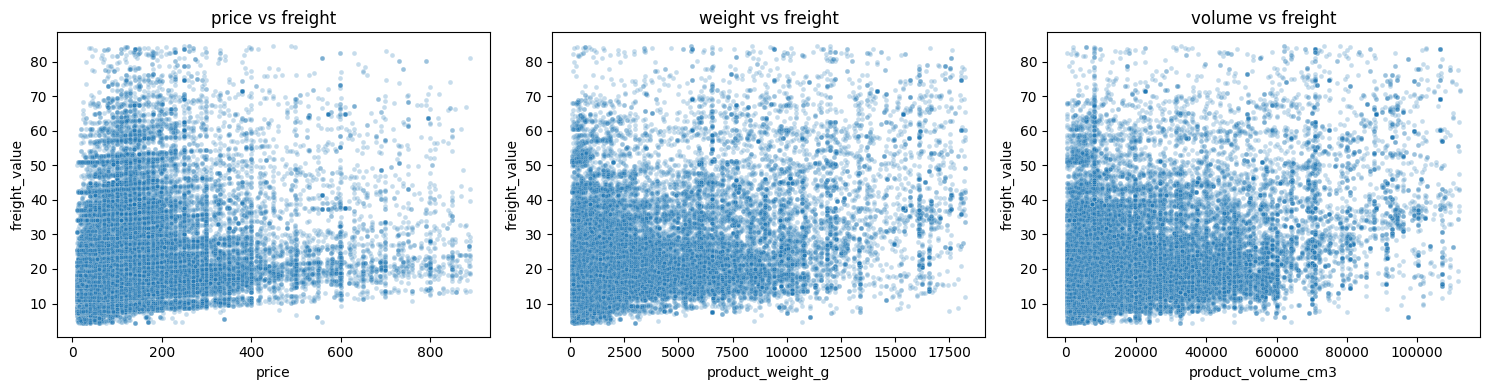

Matriz de Covarianza (sobre df_rel, sin recorte):
                           price  product_weight_g  product_volume_cm3  \
price               3.369883e+04      2.333490e+05        1.284388e+06   
product_weight_g    2.333490e+05      1.407517e+07        7.049077e+07   
product_volume_cm3  1.284388e+06      7.049077e+07        5.484625e+08   
freight_value       1.202361e+03      3.620279e+04        2.174144e+05   

                    freight_value  
price                 1202.360722  
product_weight_g     36202.786881  
product_volume_cm3  217414.417173  
freight_value          249.892731  


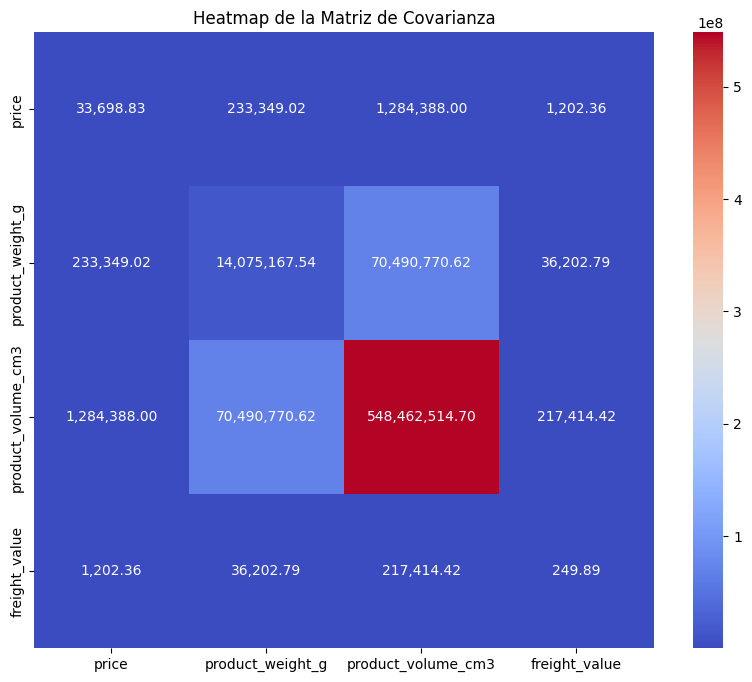

In [ ]:
pares = {
    'price_vs_freight': ('price','freight_value'),
    'weight_vs_freight': ('product_weight_g','freight_value'),
    'volume_vs_freight': ('product_volume_cm3','freight_value'),
}

# Covarianzas (muestrales)
covs = {k: df_rel[list(v)].cov().iloc[0,1] for k,v in pares.items()}
print("Covarianzas (sobre df_rel, sin recorte):")
for k, c in covs.items():
    print(f"  {k}: {c:,.2f}")

# Visual: dispersi√≥n para ver el ‚Äúco-movimiento‚Äù
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, (k,(x,y)) in zip(axes, pares.items()):
    sns.scatterplot(data=df_trim, x=x, y=y, alpha=0.25, s=12, ax=ax)
    ax.set_title(k.replace('_',' '))
plt.tight_layout()
plt.show()



# --- 1. C√ÅLCULO Y VISUALIZACI√ìN DE LA MATRIZ DE COVARIANZA ---

# Define las variables de inter√©s para la matriz
variables_matriz = ['price', 'product_weight_g', 'product_volume_cm3', 'freight_value']



# Calcula la matriz de covarianza completa
# Usamos df_rel para que los valores coincidan con los que calculaste antes
cov_matrix = df_rel[variables_matriz].cov()

print("Matriz de Covarianza (sobre df_rel, sin recorte):")
print(cov_matrix)

# Visualizaci√≥n con un heatmap para que se vea "bonito"
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=',.2f', cmap='coolwarm')
plt.title('Heatmap de la Matriz de Covarianza')
plt.show()


#### **Intrepretaci√≥n de los resultados:**

**Signo: Todas las relaciones son positivas**

El hecho de que los tres valores de covarianza sean positivos (> 0) es el primer hallazgo importante. Esto confirma tus hip√≥tesis iniciales:

*   price_vs_freight (1,202.36): A medida que el precio de un pedido sube, el costo del flete tambi√©n tiende a subir. ‚úÖ

*   weight_vs_freight (36,202.79): A medida que el peso de un producto aumenta, el costo del flete tambi√©n tiende a aumentar. ‚úÖ

*   volume_vs_freight (217,414.42): A medida que el volumen de un producto aumenta, el costo del flete tambi√©n tiende a aumentar. ‚úÖ

En resumen, el signo nos dice que todas estas variables se mueven "en la misma direcci√≥n", lo cual tiene mucho sentido desde el punto de vista del negocio.

**Magnitud: ¬°Cuidado con la escala! ‚ö†Ô∏è**
Aqu√≠ viene la parte m√°s importante y a menudo confusa. Podr√≠as pensar que la relaci√≥n volume_vs_freight es "m√°s fuerte" que la de weight_vs_freight porque 217,414 es mucho m√°s grande que 36,202. Esta conclusi√≥n es incorrecta.

*  El valor num√©rico (la magnitud) de la covarianza depende directamente de la escala de las variables que est√°s midiendo.

* El precio se mide en unidades monetarias (ej: 150.0).

* El peso se mide en gramos (ej: 3,000 g).

* El volumen se mide en cm¬≥ (ej: 25,000 cm¬≥).

Como los valores de volumen y peso son num√©ricamente mucho m√°s grandes que los de precio, es natural que su covarianza con el flete tambi√©n produzca un n√∫mero mucho mayor.

**La conclusi√≥n clave:**

La covarianza no es √∫til para comparar la fuerza de la relaci√≥n entre diferentes pares de variables. Solo te dice la direcci√≥n (positiva o negativa).

### **1.2.2 Correlaci√≥n de Pearson (relaciones lineales)**



***

# Correlaci√≥n de Pearson (Relaciones Lineales) üí°

### Definici√≥n

La **correlaci√≥n de Pearson** es la covarianza estandarizada, lo que permite comparar la fuerza de la relaci√≥n lineal entre diferentes pares de variables. Se define como:

$$\rho_{X,Y} = \frac{\operatorname{Cov}(X,Y)}{s_X s_Y}, \quad \rho \in [-1, 1]$$

Donde $s_X$ y $s_Y$ son las desviaciones est√°ndar de las variables $X$ e $Y$.

***

### Interpretaci√≥n

* **Magnitud**: El valor absoluto $|\rho|$ mide la **fuerza** de la relaci√≥n lineal.
    * $|\rho| \approx 1$: Relaci√≥n lineal casi perfecta.
    * $|\rho| \approx 0$: No hay relaci√≥n lineal.

* **Signo**: Indica la **direcci√≥n** de la relaci√≥n.
    * **Positivo (+)**: Ambas variables tienden a aumentar o disminuir juntas.
    * **Negativo (-)**: Cuando una variable aumenta, la otra tiende a disminuir.

* **Invarianza de escala**: A diferencia de la covarianza, la correlaci√≥n no tiene unidades. Esto significa que puedes comparar directamente si la relaci√≥n `peso-flete` es m√°s fuerte que la de `precio-flete`.

* **Sensibilidad a at√≠picos**: El coeficiente de Pearson es sensible a valores extremos (outliers). Si sospechas que los outliers est√°n afectando el resultado, es √∫til comparar la correlaci√≥n sobre datos recortados o usar alternativas como la correlaci√≥n de Spearman.

***

### Lectura de Negocio en Log√≠stica

* $\rho(\text{price}, \text{freight\_value}) > 0$: Indica que, de manera lineal, los pedidos m√°s caros tienden a tener un flete mayor.
* $\rho(\text{product\_weight\_g}, \text{freight\_value}) > 0$: Confirma la relaci√≥n esperada: a m√°s peso, m√°s costo de flete.
* $\rho(\text{product\_volume\_cm3}, \text{freight\_value}) > 0$: Mide qu√© tan fuerte es la relaci√≥n entre el volumen c√∫bico y el flete. Esto es clave para entender si las tarifas se basan m√°s en el peso real o en el peso dimensional (volum√©trico).

Correlaciones de Pearson con freight_value (df_rel sin recorte):
  r(price,freight_value) =  0.414 | p=0.0e+00
  r(product_weight_g,freight_value) =  0.610 | p=0.0e+00
  r(product_volume_cm3,freight_value) =  0.587 | p=0.0e+00

Correlaciones de Pearson (df_trim recortado 1‚Äì99%):
  r(price,freight_value) =  0.337 | p=0.0e+00
  r(product_weight_g,freight_value) =  0.504 | p=0.0e+00
  r(product_volume_cm3,freight_value) =  0.426 | p=0.0e+00


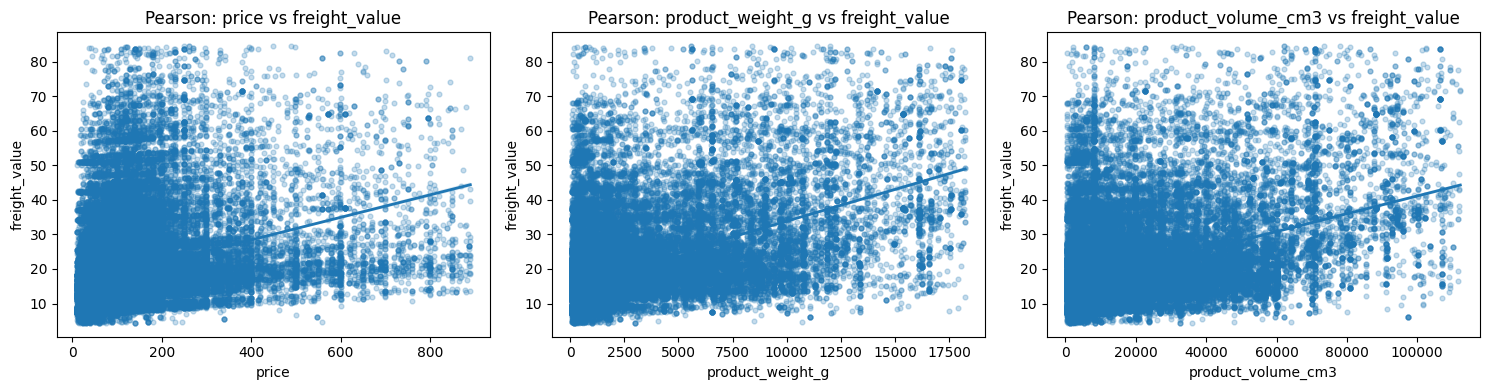

In [ ]:
targets = ['price','product_weight_g','product_volume_cm3']
y = 'freight_value'

print("Correlaciones de Pearson con freight_value (df_rel sin recorte):")
for x in targets:
    r, p = stats.pearsonr(df_rel[x], df_rel[y])
    print(f"  r({x},{y}) = {r: .3f} | p={p:.1e}")

print("\nCorrelaciones de Pearson (df_trim recortado 1‚Äì99%):")
for x in targets:
    r, p = stats.pearsonr(df_trim[x], df_trim[y])
    print(f"  r({x},{y}) = {r: .3f} | p={p:.1e}")

# Dispersi√≥n + recta de tendencia (lineal) en la muestra recortada
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, x in zip(axes, targets):
    sns.regplot(data=df_trim, x=x, y=y, scatter_kws={'alpha':0.25, 's':12}, line_kws={'lw':2}, ax=ax)
    ax.set_title(f"Pearson: {x} vs {y}")
plt.tight_layout()
plt.show()

#### **Intrepretaci√≥n de los resultados:**
En resumen, los resultados muestran que las **caracter√≠sticas f√≠sicas (peso y volumen) tienen una correlaci√≥n positiva moderada-fuerte con el costo del flete**, mientras que el precio tiene una correlaci√≥n m√°s d√©bil. Adem√°s, la presencia de valores at√≠picos est√° inflando ligeramente la fuerza de estas relaciones.

---

1. Interpretaci√≥n General (Datos `df_rel` sin recorte) üìä

Primero, analicemos el **p-valor**, que es `p=0.0e+00` (es decir, cero) para todos los casos.

* **Significancia Estad√≠stica:** Un p-valor tan bajo significa que los resultados son **extremadamente significativos**. Puedes estar muy seguro de que las correlaciones que observas no son producto del azar.

Ahora, interpretemos los coeficientes de correlaci√≥n (`r`):

* **`r(product_weight_g, freight_value) = 0.610`**: Esta es la **correlaci√≥n m√°s fuerte**. Un valor de 0.61 indica una **relaci√≥n lineal positiva y moderada-fuerte**. A medida que el peso del producto aumenta, el costo del flete tiende a aumentar de manera bastante predecible.
* **`r(product_volume_cm3, freight_value) = 0.587`**: Es una correlaci√≥n casi tan fuerte como la del peso. Indica una **relaci√≥n lineal positiva y moderada**. El volumen tambi√©n es un excelente predictor del costo del flete.
* **`r(price, freight_value) = 0.414`**: Esta es una **relaci√≥n lineal positiva, pero m√°s d√©bil** que las anteriores. Si bien los productos m√°s caros tienden a tener fletes m√°s caros, la relaci√≥n no es tan directa o fuerte como con el peso o el volumen.

---

2. El Efecto de los Outliers (Comparando `df_rel` vs. `df_trim`) üìâ

Aqu√≠ est√° la parte m√°s interesante. Al recortar los valores extremos (outliers) del 1% superior e inferior, **todas las correlaciones disminuyeron**.

* `weight`: baj√≥ de 0.610 a **0.504**
* `volume`: baj√≥ de 0.587 a **0.426**
* `price`: baj√≥ de 0.414 a **0.337**

**¬øQu√© significa esto?**

Significa que los **valores at√≠picos estaban "inflando" o fortaleciendo la correlaci√≥n lineal**. Por ejemplo, unos pocos productos extremadamente pesados y con fletes extremadamente caros hac√≠an que la l√≠nea de tendencia pareciera m√°s fuerte de lo que es para la gran mayor√≠a de los datos.

Los valores del `df_trim` (el dataset recortado) son probablemente una **representaci√≥n m√°s honesta y robusta** de la relaci√≥n para el 98% de tus pedidos "normales".

---

### 3. Conclusiones de Negocio üöö

1.  **El Peso es el Rey:** El **peso del producto es el predictor lineal m√°s fuerte** del costo de env√≠o, seguido muy de cerca por el volumen. Esto confirma que las tarifas de flete est√°n fuertemente ligadas a las caracter√≠sticas f√≠sicas del producto.
2.  **El Precio es Secundario:** El precio tiene una relaci√≥n positiva, pero es un factor menos directo. El flete no se calcula por el precio, pero quiz√°s productos m√°s caros tienden a ser m√°s pesados o voluminosos, explicando esta correlaci√≥n m√°s d√©bil.
3.  **Cuidado con los Extremos:** Tu an√°lisis muestra que los casos extremos (productos muy pesados/caros) siguen la misma tendencia, pero de forma tan marcada que sesgan ligeramente la medici√≥n general. Para predecir el costo de flete de un producto promedio, los coeficientes del `df_trim` son m√°s fiables.

### **1.2.3 Correlaci√≥n de Spearman (relaciones mon√≥tonas)**


***

## Correlaci√≥n de Spearman ($\rho_s$) para Relaciones Mon√≥tonas üìà

### Definici√≥n

La **correlaci√≥n de Spearman ($\rho_s$)** es el coeficiente de correlaci√≥n de Pearson aplicado sobre los **rangos** (las posiciones ordenadas) de las variables $X$ e $Y$.

Su principal ventaja es que captura relaciones **mon√≥tonas** (consistentemente crecientes o decrecientes), incluso si estas no son lineales.

---

### Cu√°ndo Usarla

Es la mejor opci√≥n en los siguientes escenarios:

* **Hay no linealidades evidentes**: La relaci√≥n entre las variables sigue una direcci√≥n, pero no en l√≠nea recta. Un ejemplo cl√°sico son los saltos en tarifas de flete que aumentan por tramos de peso o volumen.
* **Existen valores at√≠picos (outliers)**: Como Spearman trabaja con el orden de los datos y no con sus valores directos, es mucho menos sensible a valores extremos que puedan distorsionar la correlaci√≥n de Pearson.
* **La hip√≥tesis es general**: Esperas que "a m√°s de X, haya m√°s de Y", pero no te importa si esa relaci√≥n es perfectamente lineal.

---

### Lectura en Log√≠stica

* Si $\rho_s(\text{volume}, \text{freight}) > \rho(\text{volume}, \text{freight})$, es una fuerte se√±al de que el costo del flete crece con el volumen, pero probablemente lo hace por **tramos o escalones** (una relaci√≥n mon√≥tona, pero no estrictamente lineal).
* Es muy √∫til para validar hip√≥tesis sobre **reglas de negocio**, como el impacto de las bandas tarifarias basadas en peso o volumen.

Comparaci√≥n Pearson vs Spearman (df_trim):
  price ~ freight_value: Pearson r= 0.337 (p=0.0e+00) | Spearman œÅ= 0.402 (p=0.0e+00)
  product_weight_g ~ freight_value: Pearson r= 0.504 (p=0.0e+00) | Spearman œÅ= 0.422 (p=0.0e+00)
  product_volume_cm3 ~ freight_value: Pearson r= 0.426 (p=0.0e+00) | Spearman œÅ= 0.337 (p=0.0e+00)


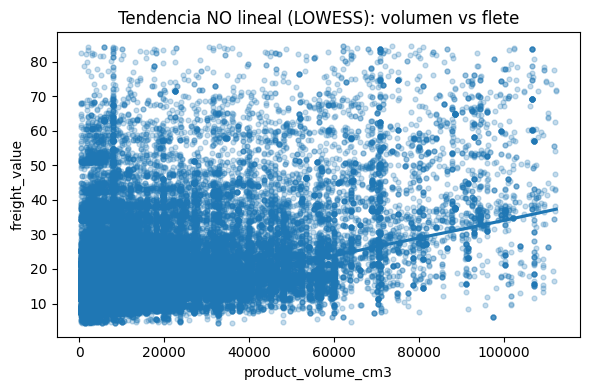

In [ ]:
targets = ['price','product_weight_g','product_volume_cm3']
y = 'freight_value'

print("Comparaci√≥n Pearson vs Spearman (df_trim):")
for x in targets:
    r_p, p_p = stats.pearsonr(df_trim[x], df_trim[y])
    r_s, p_s = stats.spearmanr(df_trim[x], df_trim[y])
    print(f"  {x} ~ {y}: Pearson r={r_p: .3f} (p={p_p:.1e}) | Spearman œÅ={r_s: .3f} (p={p_s:.1e})")

# Visual: tendencia no lineal suave (LOWESS) para un caso t√≠pico: volumen vs flete
plt.figure(figsize=(6,4))
sns.regplot(data=df_trim, x='product_volume_cm3', y='freight_value',
            lowess=True, scatter_kws={'alpha':0.25, 's':12})
plt.title("Tendencia NO lineal (LOWESS): volumen vs flete")
plt.tight_layout()
plt.show()




#### **Interpretaci√≥n: Pearson vs. Spearman**

Todos los resultados son **estad√≠sticamente significativos** (p-valor ‚âà 0), por lo que las relaciones son reales. La diferencia entre Pearson y Spearman nos revela la *forma* de esa relaci√≥n.

* **Precio vs. Flete** üí≤
    * **Resultado Clave:** La relaci√≥n es **m√°s consistente que lineal** (Spearman > Pearson).
    * **En simple:** A medida que el precio sube, el flete tambi√©n sube de forma predecible, pero no necesariamente en una l√≠nea recta perfecta. Puede haber saltos o tramos.

* **Peso vs. Flete** ‚öñÔ∏è
    * **Resultado Clave:** La relaci√≥n es **predominantemente lineal** (Pearson > Spearman).
    * **En simple:** El costo del flete aumenta de manera muy directa y proporcional al peso. Es la relaci√≥n m√°s fuerte y mejor descrita por una l√≠nea recta.

* **Volumen vs. Flete** üì¶
    * **Resultado Clave:** La relaci√≥n tambi√©n es **principalmente lineal** (Pearson > Spearman).
    * **En simple:** Al igual que con el peso, el flete aumenta de forma bastante constante y directa a medida que el volumen crece.

## **1.3 De la Muestra a la Poblaci√≥n**


### **1.3.1 Conceptos: Muestreo e Inferencia Estad√≠stica**

#### 1.3.1 Muestreo e Inferencia: ideas clave

* **Poblaci√≥n**: conjunto de todos los posibles valores de una variable (p. ej., tiempos de entrega de una PyME).
* **Muestra**: subconjunto de la poblaci√≥n que observamos (tama√±o $n$).
* **Par√°metro**: n√∫mero fijo de la poblaci√≥n (p. ej., la media $\mu$). **No lo conocemos**.
* **Estad√≠stico**: n√∫mero calculado con la muestra (p. ej., $\bar x$). **Lo observamos**.
* **Estimaci√≥n**: usar el estad√≠stico para aproximar el par√°metro ($\bar x \approx \mu$).
* **Distribuci√≥n muestral**: si repites el muestreo muchas veces, los valores del estad√≠stico cambian; esa variaci√≥n forma una distribuci√≥n (la ‚Äúvariabilidad del estimador‚Äù).
* **Error est√°ndar (SE)**: dispersi√≥n de la distribuci√≥n muestral. Para la media:

  $$
  \text{SE}(\bar X) \approx \frac{s}{\sqrt{n}}.
  $$
* **Inferencia**: sacar conclusiones sobre la poblaci√≥n (par√°metros) a partir de la muestra, cuantificando la **incertidumbre** (SE, intervalos de confianza, pruebas).

**Intuici√≥n log√≠stica/mercado**: si calculas el **promedio de d√≠as de entrega** con $n=30$ √≥rdenes, te puede salir 7.9 d√≠as; si vuelves a tomar otro $n=30$, quiz√° 8.4. No cambi√≥ la empresa: cambi√≥ **la muestra**. La **distribuci√≥n muestral** explica esa variaci√≥n.

---

Œº (poblaci√≥n, desconocido en la vida real): 8.37  |  œÉ: 4.47

Muestra n=50:
- Media muestral (xÃÑ): 7.83
- Desv. muestral (s):  3.76
- Error est√°ndar (‚âà s/‚àön): 0.53

Distribuci√≥n muestral (simulada) de xÃÑ con n=50:
- Media de xÃÑ: 8.40 (‚âà Œº)
- Desv. de xÃÑ: 0.64 (‚âà SE)


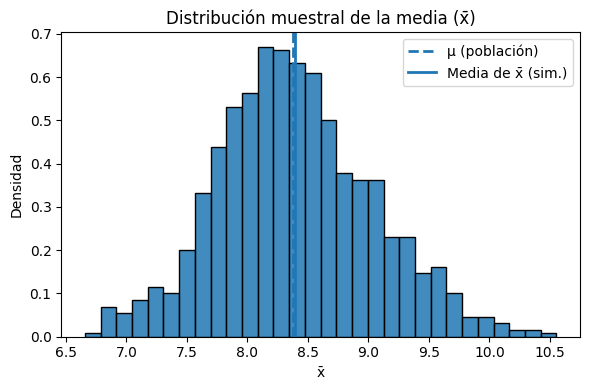

In [ ]:

rng = np.random.default_rng(42)

# Poblaci√≥n sint√©tica: "tiempos de entrega" sesgados (log-normal en d√≠as)
N = 1_000_000
pop = rng.lognormal(mean=2.0, sigma=0.5, size=N)  # media aprox e^{2 + 0.5^2/2}

mu_pop = pop.mean()
sd_pop = pop.std(ddof=0)
print(f"Œº (poblaci√≥n, desconocido en la vida real): {mu_pop:,.2f}  |  œÉ: {sd_pop:,.2f}")

# Una muestra
n = 50
sample = rng.choice(pop, size=n, replace=False)
xbar = sample.mean()
s = sample.std(ddof=1)
se_est = s/np.sqrt(n)

print(f"\nMuestra n={n}:")
print(f"- Media muestral (xÃÑ): {xbar:,.2f}")
print(f"- Desv. muestral (s):  {s:,.2f}")
print(f"- Error est√°ndar (‚âà s/‚àön): {se_est:,.2f}")

# Variabilidad del estimador: repetir muestreo muchas veces
R = 1000
means = np.array([rng.choice(pop, size=n, replace=False).mean() for _ in range(R)])

print(f"\nDistribuci√≥n muestral (simulada) de xÃÑ con n={n}:")
print(f"- Media de xÃÑ: {means.mean():,.2f} (‚âà Œº)")
print(f"- Desv. de xÃÑ: {means.std(ddof=1):,.2f} (‚âà SE)")

plt.figure(figsize=(6,4))
sns.histplot(means, bins=30, stat='density', alpha=0.85)
plt.axvline(mu_pop, linestyle='--', linewidth=2, label='Œº (poblaci√≥n)')
plt.axvline(means.mean(), linestyle='-', linewidth=2, label='Media de xÃÑ (sim.)')
plt.title("Distribuci√≥n muestral de la media (xÃÑ)")
plt.xlabel("xÃÑ")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()


### **1.3.2 Teorema del L√≠mite Central (simulaci√≥n pr√°ctica)**


El **TLC** dice que, para muchas distribuciones de partida (aunque sean sesgadas), cuando el tama√±o de muestra $n$ es suficientemente grande, la **media muestral** $\bar X$ se distribuye **aproximadamente Normal**:

$$
\bar X \approx \mathcal{N}\!\left(\mu, \frac{\sigma^2}{n}\right).
$$

**Consecuencias pr√°cticas**:

* Podemos usar herramientas normales (intervalos, pruebas) **aunque los datos originales no sean normales**, si $n$ es moderado/grande.
* Al crecer $n$, la **variabilidad** de $\bar X$ se reduce como $1/\sqrt{n}$.

**Qu√© vamos a ver**: para una poblaci√≥n sesgada (log-normal), simulamos muchas medias muestrales $\bar X$ con distintos $n$ y observamos que la forma se vuelve **m√°s normal** y **m√°s concentrada**.

---


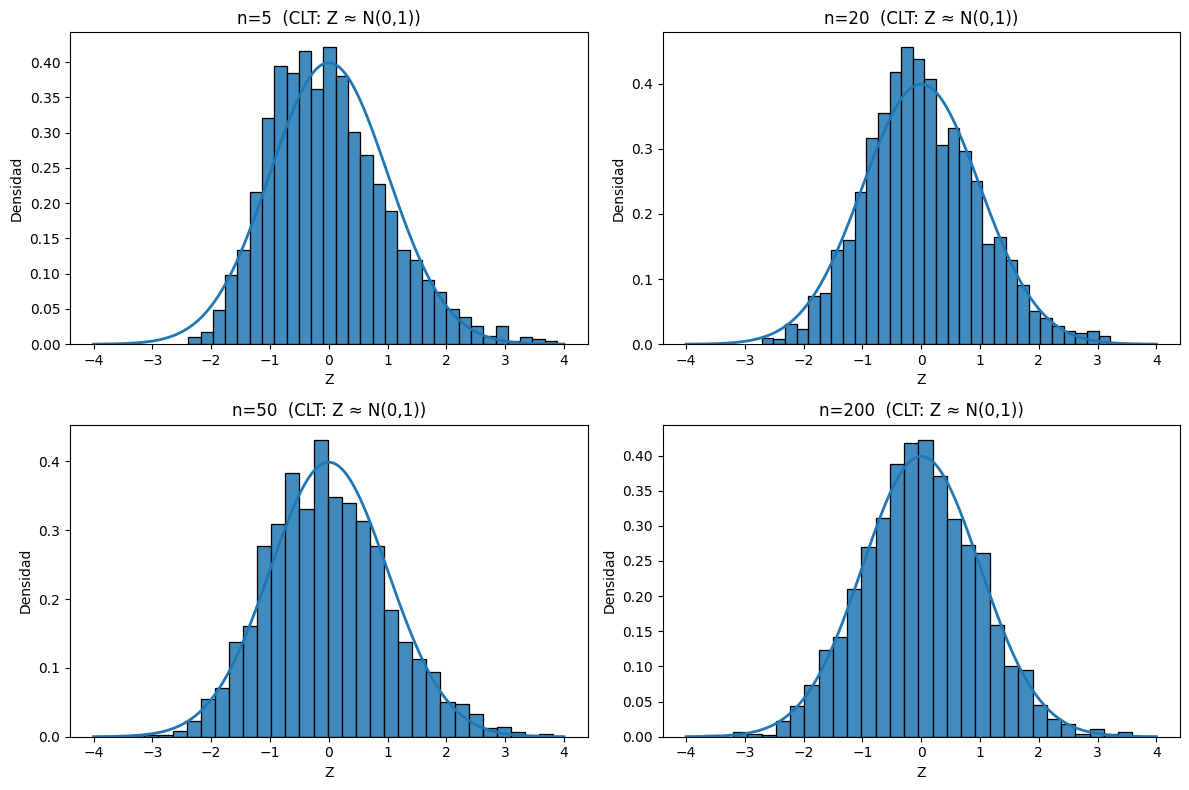

In [ ]:
from scipy import stats

rng = np.random.default_rng(123)

# Usamos la poblaci√≥n sesgada creada antes (pop, mu_pop, sd_pop)
n_list = [5, 20, 50, 200]
R = 2000

fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.ravel()

for ax, n in zip(axes, n_list):
    means = np.array([rng.choice(pop, size=n, replace=False).mean() for _ in range(R)])

    # Estandarizamos: Z = (xÃÑ - Œº) / (œÉ/‚àön) deber√≠a parecerse a N(0,1)
    Z = (means - mu_pop) / (sd_pop/np.sqrt(n))

    sns.histplot(Z, bins=30, stat='density', alpha=0.85, ax=ax)
    x = np.linspace(-4,4,400)
    ax.plot(x, stats.norm.pdf(x), linewidth=2)
    ax.set_title(f"n={n}  (CLT: Z ‚âà N(0,1))")
    ax.set_xlabel("Z")
    ax.set_ylabel("Densidad")

plt.tight_layout()
plt.show()


### **1.3.3 Bootstrapping: simulando distribuciones muestrales sin teor√≠a**


**Problema**: no conocemos la **distribuci√≥n muestral** de un estad√≠stico (media, mediana, percentil, etc.), o la f√≥rmula del SE es complicada/inexistente.

**Idea del bootstrap** (Efron):

1. Tienes **una sola muestra observada** $x = \{x_1,\dots,x_n\}$.
2. Generas $B$ **remuestras** de tama√±o $n$ **con reemplazo** desde $x$: $x^{*b}$.
3. Calculas el estad√≠stico en cada remuestra: $\theta^{*b}=t(x^{*b})$.
4. La **distribuci√≥n bootstrap** de $\theta^{*}$ **aproxima** la distribuci√≥n muestral de $\hat\theta=t(x)$.
5. Un **IC del 95%** por percentiles es $[\theta^{*}_{2.5\%}, \theta^{*}_{97.5\%}]$.

**Cu√°ndo usarlo**:

* Para **mediana**, **percentiles**, **correlaciones**, **m√©tricas no lineales**.
* Cuando el tama√±o $n$ no es enorme pero suficiente (regla de dedo: $n\gtrsim 30$ y datos representativos).
* Cuando desconf√≠as de supuestos param√©tricos (normalidad, linealidad, etc.).

---


Datos observados (n=80)
- Media    (Œ∏ÃÇ): 8.55
- Mediana  (Œ∏ÃÇ): 6.90

Intervalos de confianza (Bootstrap percentil, 95%)
- Media   : [7.37, 9.81]
- Mediana : [6.13, 7.78]


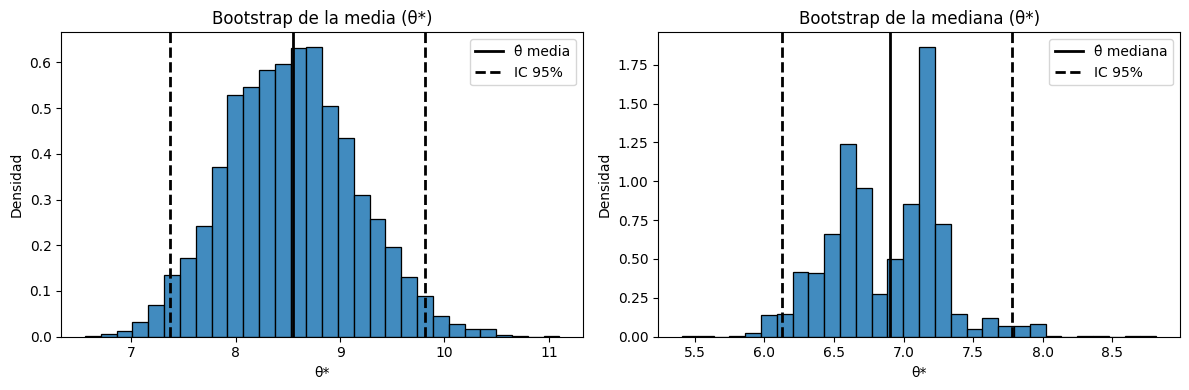


Interpretaci√≥n:
- La distribuci√≥n bootstrap aproxima c√≥mo habr√≠a variado el estimador si hubi√©ramos repetido el muestreo real.
- El IC percentil toma directamente los percentiles 2.5% y 97.5% de esa distribuci√≥n simulada.
- La mediana suele tener distribuci√≥n muestral menos 'normal' que la media; el bootstrap es especialmente √∫til all√≠.


In [ ]:

rng = np.random.default_rng(2025)

# 1) "Datos observados": simulamos que esta muestra es todo lo que tenemos
n = 80
data = rng.choice(pop, size=n, replace=False)  # en la pr√°ctica: tus datos reales
theta_hat_mean = data.mean()
theta_hat_median = np.median(data)

print(f"Datos observados (n={n})")
print(f"- Media    (Œ∏ÃÇ): {theta_hat_mean:,.2f}")
print(f"- Mediana  (Œ∏ÃÇ): {theta_hat_median:,.2f}")

# 2) Bootstrap por remuestreo con reemplazo
B = 3000
boot_means   = np.empty(B)
boot_medians = np.empty(B)

for b in range(B):
    sample_b = rng.choice(data, size=n, replace=True)
    boot_means[b]   = sample_b.mean()
    boot_medians[b] = np.median(sample_b)

# 3) ICs percentil 95%
ci_mean = np.percentile(boot_means, [2.5, 97.5])
ci_median = np.percentile(boot_medians, [2.5, 97.5])

print("\nIntervalos de confianza (Bootstrap percentil, 95%)")
print(f"- Media   : [{ci_mean[0]:.2f}, {ci_mean[1]:.2f}]")
print(f"- Mediana : [{ci_median[0]:.2f}, {ci_median[1]:.2f}]")

# 4) Visualizaci√≥n de las distribuciones bootstrap
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(boot_means, bins=30, stat='density', alpha=0.85, ax=axes[0])
axes[0].axvline(theta_hat_mean, color='k', linestyle='-', linewidth=2, label='Œ∏ÃÇ media')
axes[0].axvline(ci_mean[0], color='k', linestyle='--', linewidth=2, label='IC 95%')
axes[0].axvline(ci_mean[1], color='k', linestyle='--', linewidth=2)
axes[0].set_title("Bootstrap de la media (Œ∏*)")
axes[0].set_xlabel("Œ∏*")
axes[0].set_ylabel("Densidad")
axes[0].legend()

sns.histplot(boot_medians, bins=30, stat='density', alpha=0.85, ax=axes[1])
axes[1].axvline(theta_hat_median, color='k', linestyle='-', linewidth=2, label='Œ∏ÃÇ mediana')
axes[1].axvline(ci_median[0], color='k', linestyle='--', linewidth=2, label='IC 95%')
axes[1].axvline(ci_median[1], color='k', linestyle='--', linewidth=2)
axes[1].set_title("Bootstrap de la mediana (Œ∏*)")
axes[1].set_xlabel("Œ∏*")
axes[1].set_ylabel("Densidad")
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nInterpretaci√≥n:")
print("- La distribuci√≥n bootstrap aproxima c√≥mo habr√≠a variado el estimador si hubi√©ramos repetido el muestreo real.")
print("- El IC percentil toma directamente los percentiles 2.5% y 97.5% de esa distribuci√≥n simulada.")
print("- La mediana suele tener distribuci√≥n muestral menos 'normal' que la media; el bootstrap es especialmente √∫til all√≠.")

## **1.4 Validaci√≥n de Supuestos**

**Objetivo.** Evaluar una afirmaci√≥n sobre un **par√°metro poblacional** (p. ej., la media $\mu$) con evidencia de una muestra.

### **1.4.1 Test de Hip√≥tesis: el framework cient√≠fico**


**Objetivo.** Evaluar una afirmaci√≥n sobre un **par√°metro poblacional** (p. ej., la media $\mu$) con evidencia de una muestra.

**T√©rminos clave (con significado):**

* **Poblaci√≥n**: todos los posibles casos (p. ej., todos los tiempos de entrega futuros de la PyME).
* **Par√°metro**: n√∫mero fijo de la poblaci√≥n (p. ej., $\mu=$ media verdadera de d√≠as de entrega). **No lo conocemos**.
* **Muestra**: datos observados (p. ej., $n=50$ pedidos recientes).
* **Estad√≠stico**: n√∫mero calculado con la muestra (p. ej., $\bar x=$ media muestral). **S√≠ lo conocemos**.
* **Hip√≥tesis nula** $H_0$: punto de comparaci√≥n/base (p. ej., $\mu=8$ d√≠as).
* **Hip√≥tesis alternativa** $H_1$: lo que queremos evidenciar (p. ej., $\mu>8$ si sospechamos retrasos).
* **Nivel de significancia** $\alpha$: tolerancia m√°xima a **falsos positivos** (error Tipo I). T√≠pico $\alpha=0.05$.
* **Estad√≠stico de prueba**: transforma los datos para medir cu√°n compatibles son con $H_0$ (p. ej., estad√≠stico t).
* **Regla de decisi√≥n**: si el **p-valor $\le \alpha$** ‚Üí **rechazar $H_0$**; si no ‚Üí **no rechazar $H_0$**.

n=50  xÃÑ=8.36  s=4.31
t=0.593  |  p(cola derecha)=0.2778  |  Œ±=0.05
IC 95% para Œº: [7.14, 9.59]
Cohen's d (vs Œº0): 0.08
Decisi√≥n: NO rechazar H0


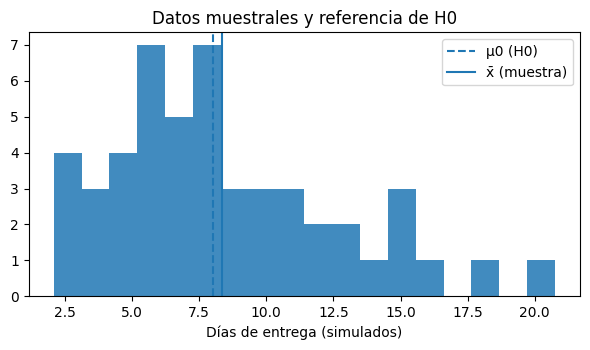


C√≥mo leer esto:
- Si p ‚â§ Œ±, decimos que hay evidencia estad√≠stica para un aumento (Œº > 8).
- El IC 95% muestra el rango plausible de Œº; si todo el IC > 8, refuerza la conclusi√≥n.
- Cohen's d sugiere magnitud del cambio en 'desv. est√°ndar muestral'.


In [ ]:
# Test t de 1 muestra, H0: mu = 8 vs H1: mu > 8 (cola derecha)


rng = np.random.default_rng(2025)

# Poblaci√≥n sint√©tica: "d√≠as de entrega" sesgados (log-normal)
pop = rng.lognormal(mean=2.0, sigma=0.5, size=1_000_000)

mu0 = 8.0     # valor propuesto por H0
alpha = 0.05  # tolerancia a falsos positivos
n = 50        # tama√±o de muestra (t√≠pico en control operativo)

# 1) "Recolectamos" muestra
x = rng.choice(pop, size=n, replace=False)
xbar = x.mean()
s = x.std(ddof=1)

# 2) Estad√≠stico t y p-valor (cola derecha)
t_stat = (xbar - mu0) / (s / np.sqrt(n))
p_right = 1 - stats.t.cdf(t_stat, df=n-1)

# 3) Intervalo de confianza 95% para la media
ci_low, ci_high = stats.t.interval(confidence=0.95, df=n-1, loc=xbar, scale=s/np.sqrt(n))

# 4) Tama√±o de efecto (Cohen's d) relativo a mu0
cohen_d = (xbar - mu0) / s

print(f"n={n}  xÃÑ={xbar:.2f}  s={s:.2f}")
print(f"t={t_stat:.3f}  |  p(cola derecha)={p_right:.4f}  |  Œ±={alpha}")
print(f"IC 95% para Œº: [{ci_low:.2f}, {ci_high:.2f}]")
print(f"Cohen's d (vs Œº0): {cohen_d:.2f}")

decision = "RECHAZAR H0" if p_right <= alpha else "NO rechazar H0"
print(f"Decisi√≥n: {decision}")

# 5) Visual: comparaci√≥n de la media muestral con Œº0
plt.figure(figsize=(6,3.6))
plt.hist(x, bins=18, alpha=0.85)
plt.axvline(mu0, ls='--', label='Œº0 (H0)')
plt.axvline(xbar, ls='-', label='xÃÑ (muestra)')
plt.title("Datos muestrales y referencia de H0")
plt.xlabel("D√≠as de entrega (simulados)")
plt.legend()
plt.tight_layout()
plt.show()

# --- Interpretaci√≥n pr√°ctica ---
print("\nC√≥mo leer esto:")
print("- Si p ‚â§ Œ±, decimos que hay evidencia estad√≠stica para un aumento (Œº > 8).")
print("- El IC 95% muestra el rango plausible de Œº; si todo el IC > 8, refuerza la conclusi√≥n.")
print("- Cohen's d sugiere magnitud del cambio en 'desv. est√°ndar muestral'.")


#### **Intrepretaci√≥n de los resultados:**

En resumen, aunque el promedio de tu muestra (8.36) es un poco m√°s alto que 8, **no tienes evidencia estad√≠stica suficiente para afirmar que ha habido un aumento real**. La peque√±a diferencia que observaste se debe muy probablemente al azar.

---

### El Veredicto en Simple üßê

Imagina que quieres saber si los estudiantes de un colegio ahora son m√°s altos que el promedio hist√≥rico de 1.60 m. Tomas una muestra y te da un promedio de 1.61 m. La pregunta clave es: *¬øEse cent√≠metro extra es una tendencia real o simplemente tuviste la suerte de medir a algunos de los estudiantes m√°s altos?*

Tu an√°lisis estad√≠stico responde a esta pregunta:

* **Tu resultado (`xÃÑ=8.36`):** Es un poco mayor que 8.
* **La conclusi√≥n (`No rechazar H0`):** No puedes concluir que el promedio real sea mayor que 8. La diferencia es tan peque√±a que se considera "ruido estad√≠stico" o una simple casualidad de la muestra que tomaste.

---

### Desglose de los Resultados

Aqu√≠ te explico qu√© significa cada pieza de tu an√°lisis, como pediste:

#### 1. El p-valor (`p = 0.2778`)

* **Qu√© es:** Es la probabilidad de obtener un resultado como el tuyo (o m√°s extremo) si en realidad no hubiera ning√∫n cambio (es decir, si el promedio real siguiera siendo 8).
* **Tu resultado:** Tu p-valor es de `0.2778`, o un **27.8%**.
* **Interpretaci√≥n sencilla:** Hay una probabilidad de casi el 28% de que obtengas una media de 8.36 solo por pura casualidad, aunque el promedio real no haya subido de 8. Como esta probabilidad es muy alta (mucho mayor que tu umbral del 5% o `Œ±=0.05`), no puedes considerar tu hallazgo como una evidencia s√≥lida. Es un resultado muy com√∫n y no indica un cambio real.

> **Regla clave:** Si `p ‚â§ Œ±`, el resultado es significativo. En tu caso, `0.2778 > 0.05`, por lo que no es significativo.

#### 2. El Intervalo de Confianza (IC 95% para Œº: `[7.14, 9.59]`)

* **Qu√© es:** Es el rango de valores donde tienes un 95% de confianza de que se encuentra el *verdadero promedio* de toda la poblaci√≥n.
* **Tu resultado:** Tu rango va de 7.14 a 9.59.
* **Interpretaci√≥n sencilla:** El verdadero promedio podr√≠a ser tan bajo como 7.14 o tan alto como 9.59. Como el n√∫mero **8 est√° incluido en este rango**, es totalmente plausible que el promedio real siga siendo 8. Si realmente hubiera un aumento, todo el intervalo deber√≠a estar por encima de 8 (por ejemplo, `[8.1, 9.8]`).

#### 3. La d de Cohen (`d = 0.08`)

* **Qu√© es:** Mide el **tama√±o o la magnitud del efecto** que observaste, sin importar si es estad√≠sticamente significativo. Mide qu√© tan grande es la diferencia en t√©rminos de desviaciones est√°ndar.
* **Tu resultado:** `0.08`.
* **Interpretaci√≥n sencilla:** Esto indica que la diferencia entre tu media muestral (8.36) y el valor de referencia (8) es de apenas 0.08 desviaciones est√°ndar. Es un **efecto min√∫sculo o insignificante**. Incluso si tuvieras una muestra gigante y el resultado fuera "estad√≠sticamente significativo", la d de Cohen te dir√≠a que el cambio es tan peque√±o que en la pr√°ctica no tiene ninguna importancia.

### **1.4.2 Significancia Estad√≠stica (p-valor)**

* **Definici√≥n.** El **p-valor** es la **probabilidad**, **asumiendo que $H_0$ es verdadera**, de obtener un resultado **tan extremo o m√°s** que el observado.

  * Ej.: si $H_0$ dice $\mu=8$ y vemos $\bar x=9.1$, el p-valor es la probabilidad (bajo $\mu=8$) de ver $\bar X\ge 9.1$ por puro azar.
* **Regla de decisi√≥n.** Si $p \le \alpha$, **rechazamos $H_0$** (resultado ‚Äúestad√≠sticamente significativo‚Äù).
* **Lo que NO es.** No es ‚Äúla probabilidad de que $H_0$ sea verdadera/falsa‚Äù, ni ‚Äúla magnitud del efecto‚Äù.
* **Cuidado con el tama√±o muestral.** Con $n$ enorme, peque√±as diferencias se vuelven ‚Äúsignificativas‚Äù (p muy chico) sin relevancia pr√°ctica. Por eso se reporta tambi√©n **tama√±o de efecto** e **IC**.

**Hecho importante.** Si $H_0$ fuese cierta y repiti√©semos el experimento innumerables veces, alrededor de un $\alpha$% de los p-valores caer√≠an por debajo de $\alpha$ **por azar** (falsos positivos).


Bajo H0: proporci√≥n de p ‚â§ 0.05: 0.056  (‚âà Œ± esperado)
Bajo H1: proporci√≥n de p ‚â§ 0.05: 0.562  (‚âà potencia)


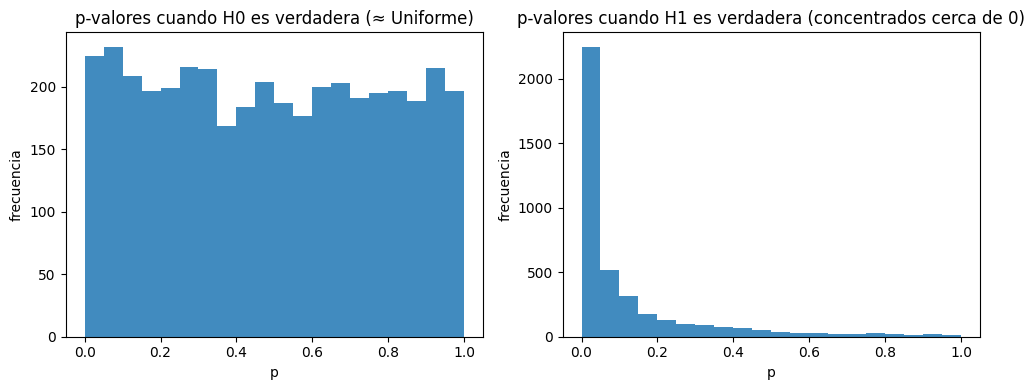


Lectura:
- Cuando H0 es cierta, ‚âàŒ± de las veces p‚â§Œ± (falsos positivos esperados).
- Cuando H1 es cierta, muchos p caen cerca de 0 (mayor potencia).


In [ ]:
# Distribuci√≥n de p-valores cuando H0 es verdadera vs cuando H1 es verdadera


rng = np.random.default_rng(7)
alpha = 0.05
R = 4000
n = 30

# H0 verdadera: mu=0
pvals_H0 = []
for _ in range(R):
    x = rng.normal(loc=0, scale=1, size=n)
    t_stat, p_two = stats.ttest_1samp(x, popmean=0.0)  # prueba de 2 colas
    pvals_H0.append(p_two)

# H1 verdadera: mu=delta (>0)
delta = 0.4  # tama√±o de efecto peque√±o-moderado
pvals_H1 = []
for _ in range(R):
    x = rng.normal(loc=delta, scale=1, size=n)
    t_stat, p_two = stats.ttest_1samp(x, popmean=0.0)
    pvals_H1.append(p_two)

pvals_H0 = np.array(pvals_H0)
pvals_H1 = np.array(pvals_H1)

print(f"Bajo H0: proporci√≥n de p ‚â§ {alpha}: {(pvals_H0 <= alpha).mean():.3f}  (‚âà Œ± esperado)")
print(f"Bajo H1: proporci√≥n de p ‚â§ {alpha}: {(pvals_H1 <= alpha).mean():.3f}  (‚âà potencia)")

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(pvals_H0, bins=20, range=(0,1), alpha=0.85)
plt.title("p-valores cuando H0 es verdadera (‚âà Uniforme)")
plt.xlabel("p"); plt.ylabel("frecuencia")

plt.subplot(1,2,2)
plt.hist(pvals_H1, bins=20, range=(0,1), alpha=0.85)
plt.title("p-valores cuando H1 es verdadera (concentrados cerca de 0)")
plt.xlabel("p"); plt.ylabel("frecuencia")

plt.tight_layout()
plt.show()

print("\nLectura:")
print("- Cuando H0 es cierta, ‚âàŒ± de las veces p‚â§Œ± (falsos positivos esperados).")
print("- Cuando H1 es cierta, muchos p caen cerca de 0 (mayor potencia).")


#### **La Analog√≠a del Detector de Humo üí®**

Los resultados muestran que tu prueba estad√≠stica est√° bien configurada para evitar conclusiones falsas cuando no pasa nada (**controla bien los falsos positivos**), pero es relativamente d√©bil para encontrar un efecto real cuando s√≠ existe (**tiene una potencia modesta**).



Imagina que tu prueba estad√≠stica es un detector de humo.

* **No hay fuego ($H‚ÇÄ$ es cierta):** La situaci√≥n normal.
* **S√≠ hay fuego ($H‚ÇÅ$ es cierta):** Existe un peligro real que se debe detectar.
* **La alarma suena ($p \le 0.05$):** Concluyes que hay un efecto (o un fuego).

Ahora, veamos tus dos escenarios.

***

### 1. Cuando NO hay un efecto real (Bajo $H‚ÇÄ$)
> `proporci√≥n de p ‚â§ 0.05: 0.056`

Esto es como probar tu detector de humo quemando una tostada. Idealmente, no deber√≠a sonar, pero a veces lo hace.

* **Lo que significa:** Si repitieras tu experimento muchas veces en una situaci√≥n donde **no hay ning√∫n efecto real**, aproximadamente el **5.6%** de las veces, por pura casualidad, tu prueba har√≠a sonar la alarma y te har√≠a creer err√≥neamente que encontraste algo importante.
* **Tu lectura es correcta:** Este `5.6%` es la tasa de **falsos positivos** (Error de Tipo I). Est√° muy cerca de tu nivel de significancia `Œ±=0.05`, lo que indica que la prueba se comporta como esperas. Est√°s dispuesto a aceptar un 5% de "falsas alarmas", y eso es lo que obtienes.

***

### 2. Cuando S√ç hay un efecto real (Bajo $H‚ÇÅ$)
> `proporci√≥n de p ‚â§ 0.05: 0.562`

Esto es como probar tu detector con un fuego de verdad. Quieres que la alarma suene siempre.

* **Lo que significa:** Cuando **s√≠ existe un efecto real** que se puede descubrir, tu prueba tiene una **capacidad del 56.2% para detectarlo** y hacer sonar la alarma correctamente.
* **Tu lectura es correcta:** Este `56.2%` es la **potencia estad√≠stica** de tu prueba. Es la probabilidad de tener un **verdadero positivo**.

### Conclusi√≥n Pr√°ctica üéØ

* **El lado bueno:** Puedes confiar en que tu prueba no te dar√° falsas alarmas a menudo. Est√° bien calibrada para ser cautelosa.
* **El lado malo:** Con una potencia del 56.2%, tu prueba no es muy sensible. Esto significa que tienes una probabilidad considerable (**43.8%**) de **no detectar un efecto aunque sea real** (esto se conoce como un falso negativo o Error de Tipo II). En la analog√≠a, ser√≠a un fuego real que tu detector no logra percibir.

Generalmente, en investigaci√≥n se busca una potencia del 80% (`0.80`) o m√°s. Un valor de `0.562` se considera bajo, lo que sugiere que tu estudio podr√≠a necesitar una muestra m√°s grande u otro ajuste para tener una mejor oportunidad de encontrar lo que buscas.

### **1.4.3 Error Tipo I y Error Tipo II: los dos tipos de equivocaciones**

* **Error Tipo I (Œ±)**: Rechazar $H_0$ **siendo verdadera** (falso positivo). $\alpha$ es la probabilidad de cometer este error **por dise√±o** (p. ej., 5%).
* **Error Tipo II (Œ≤)**: **No** rechazar $H_0$ **siendo falsa** (falso negativo).
* **Potencia** $=1-Œ≤$: Probabilidad de **detectar** un efecto real (es decir, rechazar $H_0$ cuando $H_1$ es cierta).

**C√≥mo aumentar la potencia (disminuir Œ≤):**

* **M√°s muestra** $n$ (reduce el error est√°ndar).
* **Menos ruido** (mejor medici√≥n, segmentar por categor√≠as homog√©neas).
* **Mayor efecto** (si el cambio real es m√°s grande, se detecta m√°s f√°cil).
* **Prueba adecuada** y (cuando es justificable) **unilateral** si la direcci√≥n del efecto es clara.

**Trade-off**: bajar $\alpha$ reduce falsos positivos, pero **baja potencia** si todo lo dem√°s queda igual (aumenta Œ≤).

**Ejemplo log√≠stico.** Si realmente la media es $\mu=8.5$ (peor que 8), pero tu $n$ es peque√±o y/o hay mucho ruido, puedes **no detectarlo** (error Tipo II). Planear $n$ suficiente es clave.


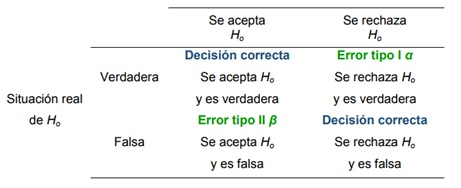


n=30, delta=0.5:  Tipo I‚âà0.049  |  Tipo II‚âà0.254  |  Potencia‚âà0.746


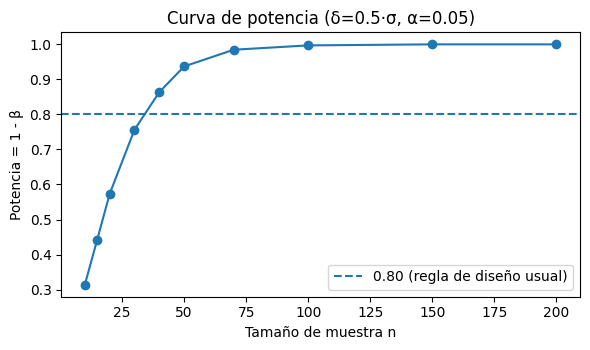


Lectura:
- Tipo I se acerca a Œ± (controlado por dise√±o).
- La potencia crece con n y con el tama√±o del efecto Œ¥.
- Para lograr potencia ‚â•0.80 con Œ¥ dado, necesitas un n m√≠nimo (planificaci√≥n de muestras).


In [ ]:
# Simulaci√≥n de tasas de Error Tipo I, Tipo II y Potencia (prueba t de 1 muestra, 2 colas)


rng = np.random.default_rng(123)
alpha = 0.05
R = 3000

def sim_rates(n, delta, sigma=1.0):
    # H0: mu=0 ; H1 verdadera: mu=delta
    # Devuelve: (Tipo I, Tipo II, Potencia)
    # Tipo I: cuando H0 es verdadera
    pvals_H0 = []
    for _ in range(R):
        x = rng.normal(loc=0.0, scale=sigma, size=n)
        t, p = stats.ttest_1samp(x, popmean=0.0)  # dos colas
        pvals_H0.append(p)
    typeI = (np.array(pvals_H0) <= alpha).mean()

    # Potencia: cuando H1 es verdadera
    pvals_H1 = []
    for _ in range(R):
        x = rng.normal(loc=delta, scale=sigma, size=n)
        t, p = stats.ttest_1samp(x, popmean=0.0)
        pvals_H1.append(p)
    power = (np.array(pvals_H1) <= alpha).mean()
    typeII = 1 - power
    return typeI, typeII, power

# 1) Un punto de trabajo
n = 30
delta = 0.5  # efecto real en unidades de desviaci√≥n est√°ndar
typeI, typeII, power = sim_rates(n=n, delta=delta)
print(f"n={n}, delta={delta}:  Tipo I‚âà{typeI:.3f}  |  Tipo II‚âà{typeII:.3f}  |  Potencia‚âà{power:.3f}")

# 2) Curva de potencia vs n (dise√±o muestral)
n_grid = [10, 15, 20, 30, 40, 50, 70, 100, 150, 200]
powers = []
for n in n_grid:
    _, _, pw = sim_rates(n=n, delta=delta)
    powers.append(pw)

plt.figure(figsize=(6,3.6))
plt.plot(n_grid, powers, marker='o')
plt.axhline(0.80, ls='--', label='0.80 (regla de dise√±o usual)')
plt.title(f"Curva de potencia (Œ¥={delta}¬∑œÉ, Œ±={alpha})")
plt.xlabel("Tama√±o de muestra n")
plt.ylabel("Potencia = 1 - Œ≤")
plt.legend()
plt.tight_layout()
plt.show()

print("\nLectura:")
print("- Tipo I se acerca a Œ± (controlado por dise√±o).")
print("- La potencia crece con n y con el tama√±o del efecto Œ¥.")
print("- Para lograr potencia ‚â•0.80 con Œ¥ dado, necesitas un n m√≠nimo (planificaci√≥n de muestras).")


#### **Intrepretaci√≥n de los resultados:**

Piensa en tu prueba estad√≠stica como un detective que intenta resolver un caso. El "efecto" (una diferencia o relaci√≥n real) es el culpable. üïµÔ∏è

## Error de Tipo I (‚âà0.049)

Esta es la probabilidad de que el detective **acuse a una persona inocente**. Tu tasa es de aproximadamente **4.9%**, lo que est√° muy cerca del l√≠mite est√°ndar del 5% (`Œ±=0.05`). Esto significa que tu "detective" est√° bien calibrado y rara vez hace acusaciones falsas. Este es tu **riesgo de un falso positivo**.

***

## Potencia (‚âà0.746)

Esta es la probabilidad de que el detective **atrape al verdadero culpable** cuando este realmente ha cometido el crimen. Tu potencia es de aproximadamente **74.6%**. Esto significa que si existe un efecto real del tama√±o `Œ¥=0.5`, tu experimento tiene una probabilidad de ~75% de encontrarlo. Esta es tu **tasa de un verdadero positivo**.

***

## Error de Tipo II (‚âà0.254)

Esta es la probabilidad de que el detective **deje escapar al culpable**. Tu tasa es de aproximadamente **25.4%**. Es la otra cara de la potencia (`1 - 0.746`). Hay una probabilidad de ~25% de que tu experimento no detecte el efecto, a pesar de que sea real. Este es tu **riesgo de un falso negativo**.

***

## En Resumen

Tu experimento tiene un **bajo riesgo de "llorar lobo"** (acusar a un inocente), pero una **posibilidad moderada de no ver al lobo real**.

El objetivo com√∫n es tener una potencia de al menos el 80% (`‚â•0.80`). Tu resultado (`74.6%`) est√° cerca, pero no llega a esa meta. Como tus notas se√±alan correctamente, para aumentar la potencia y mejorar tus posibilidades de encontrar el efecto, necesitar√≠as **aumentar el tama√±o de tu muestra (`n`)**.

#  **Secci√≥n 2: Introducci√≥n a la Optimizaci√≥n Lineal**


La **optimizaci√≥n lineal**, tambi√©n conocida como programaci√≥n lineal, es una t√©cnica matem√°tica que se utiliza para encontrar el mejor resultado posible (como el m√°ximo beneficio o el costo m√°s bajo) en un modelo cuyos requisitos se representan mediante relaciones lineales.

Consiste en maximizar o minimizar una funci√≥n lineal, sujeta a un conjunto de restricciones tambi√©n lineales.

***

### Formulaci√≥n Matem√°tica

El objetivo de un problema de optimizaci√≥n lineal se puede expresar matem√°ticamente de la siguiente forma:

#### **1. Funci√≥n Objetivo**
Es la ecuaci√≥n que se desea maximizar o minimizar.

$$\text{Maximizar o Minimizar } Z = c_1x_1 + c_2x_2 + \dots + c_nx_n$$

Donde:
* **$Z$** es el valor a optimizar (ej. beneficio, costo).
* **$x_1, x_2, \dots, x_n$** son las **variables de decisi√≥n** (ej. cantidad de productos a fabricar).
* **$c_1, c_2, \dots, c_n$** son los coeficientes de la funci√≥n objetivo (ej. el precio o costo de cada producto).

#### **2. Restricciones**
Son las limitaciones o condiciones que deben cumplirse, expresadas como inecuaciones o ecuaciones lineales.

$$
\begin{align*}
a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n & \le b_1 \\
a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n & \le b_2 \\
\vdots \qquad & \vdots \\
a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n & \le b_m
\end{align*}
$$

Donde:
* **$a_{ij}$** son los coeficientes t√©cnicos que indican c√≥mo cada variable consume un recurso.
* **$b_i$** representa la cantidad disponible de cada recurso (ej. horas de mano de obra, kilos de materia prima).
* El s√≠mbolo de la inecuaci√≥n puede ser `‚â§`, `‚â•` o `=`.

#### **3. Restricci√≥n de no negatividad**
Las variables de decisi√≥n generalmente no pueden tomar valores negativos.

$$x_1, x_2, \dots, x_n \ge 0$$

## **2.1 Programaci√≥n de personal con optimizaci√≥n lineal**

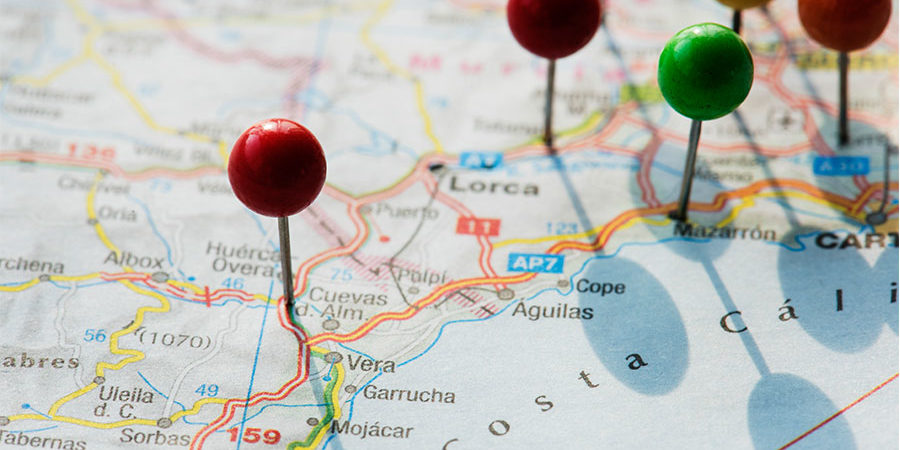


# Programaci√≥n de Personal (5x2) con Optimizaci√≥n Lineal (MILP)

**Enunciado.**  
Un restaurante atiende al p√∫blico los siete d√≠as de la semana. Se contratan camareros que trabajan **seis horas diarias**. El contrato con el sindicato estipula que **cada camarero trabaja cinco d√≠as consecutivos y descansa dos** (ciclo 5√ó2). Todos reciben el mismo salario.  

Las **horas m√≠nimas requeridas** por d√≠a son:

| D√≠a | Horas m√≠nimas |
|---|---:|
| Lunes | 150 |
| Martes | 200 |
| Mi√©rcoles | 400 |
| Jueves | 300 |
| Viernes | 700 |
| S√°bado | 800 |
| Domingo | 300 |

Se desea encontrar un **programa de empleo** que satisfaga estos requerimientos con **costo m√≠nimo** (equivalente a **minimizar la cantidad total de camareros**, ya que todos ganan lo mismo).

> Resolveremos el problema con **Optimizaci√≥n Lineal Entera** paso a paso y validaremos la soluci√≥n.


In [ ]:
# D√≠as (c√≥digos sin tildes para variables) y nombres bonitos para mostrar
day_codes = ["Lun","Mar","Mie","Jue","Vie","Sab","Dom"]
day_names = {
    "Lun": "Lunes",
    "Mar": "Martes",
    "Mie": "Mi√©rcoles",
    "Jue": "Jueves",
    "Vie": "Viernes",
    "Sab": "S√°bado",
    "Dom": "Domingo",
}

# Horas m√≠nimas requeridas por d√≠a (del enunciado)
hours_req = {
    "Lun": 150,
    "Mar": 200,
    "Mie": 400,
    "Jue": 300,
    "Vie": 700,
    "Sab": 800,
    "Dom": 300,
}

H = 6  # horas que aporta un camarero por d√≠a (6 h/d√≠a)

import pandas as pd
df_hours = pd.DataFrame(
    {"D√≠a": [day_names[d] for d in day_codes],
     "Horas m√≠nimas": [hours_req[d] for d in day_codes]}
)
df_hours


D√≠a  Horas m√≠nimas
0      Lunes            150
1     Martes            200
2  Mi√©rcoles            400
3     Jueves            300
4    Viernes            700
5     S√°bado            800
6    Domingo            300

#### Restricci√≥n de Personal M√≠nimo por D√≠a

Para asegurar que se cubra la demanda m√≠nima de horas cada d√≠a, se establece la siguiente restricci√≥n.

Primero, definimos la **cantidad m√≠nima de camareros necesarios** para un d√≠a $t$, denotada como $N_t$:

$$N_t = \left\lceil \frac{H_t}{6} \right\rceil$$

Donde:
* $H_t$ es el total de **horas m√≠nimas requeridas** en el d√≠a $t$.
* El operador $\lceil \cdot \rceil$ es la **funci√≥n techo**, que redondea el resultado hacia el entero superior m√°s cercano.

A continuaci√≥n, definimos una **variable de decisi√≥n binaria** $x_{i,t}$ para cada camarero $i$ y cada d√≠a $t$:

$$x_{i,t} = \begin{cases} 1 & \text{si el camarero } i \text{ trabaja el d√≠a } t \\ 0 & \text{en caso contrario} \end{cases}$$

La restricci√≥n final exige que la suma de los camareros que trabajan en un d√≠a espec√≠fico sea, como m√≠nimo, la cantidad necesaria $N_t$. Esto se formula de la siguiente manera:

$$\sum_{i \in C} x_{i,t} \geq N_t \quad \forall t \in D$$

Donde:
* $C$ es el conjunto de todos los camareros disponibles.
* $D$ es el conjunto de todos los d√≠as del per√≠odo de planificaci√≥n.
* El s√≠mbolo $\forall$ significa "para todo", indicando que esta restricci√≥n debe cumplirse para cada uno de los d√≠as.


In [ ]:
import math
N = {d: math.ceil(hours_req[d] / H) for d in day_codes}

df_people = pd.DataFrame(
    {"D√≠a": [day_names[d] for d in day_codes],
     "Personas requeridas N_t": [N[d] for d in day_codes]}
)
df_people


D√≠a  Personas requeridas N_t
0      Lunes                       25
1     Martes                       34
2  Mi√©rcoles                       67
3     Jueves                       50
4    Viernes                      117
5     S√°bado                      134
6    Domingo                       50

### ¬øC√≥mo funciona este modelo en t√©rminos simples?

Imagina que en lugar de contratar camareros individuales, est√°s formando **7 equipos**, uno por cada d√≠a de la semana.

* El **"Equipo del Lunes"** (`x_Lunes`) es el grupo de personas que siempre empieza su semana laboral de 5 d√≠as el lunes.
* El **"Equipo del Martes"** (`x_Martes`) es el que siempre empieza el martes, y as√≠ sucesivamente.

Tu modelo responde a dos preguntas fundamentales:

1.  **Decisi√≥n Principal:** ¬øQu√© **tama√±o** debe tener cada uno de estos 7 equipos (`x_Lunes`, `x_Martes`, ..., `x_Domingo`)?

2.  **Objetivo:** ¬øC√≥mo hacemos que estos equipos sean lo m√°s peque√±os posible en total (`min Œ£ x_d`) para no contratar a m√°s gente de la necesaria?

---

### La Clave: Las Restricciones de Cobertura

La parte m√°s importante es asegurarte de que cada d√≠a tengas suficientes manos trabajando. Tu ecuaci√≥n de restricciones hace exactamente esto:

$$\sum_{d} a_{td}\,x_d \;\ge\; N_t$$

Ve√°moslo con un ejemplo para un d√≠a concreto, digamos el **mi√©rcoles** (`t` = Mi√©rcoles):

* **Pregunta:** ¬øQui√©nes est√°n trabajando el mi√©rcoles?
* **Respuesta:** Todos los equipos cuyo bloque de 5 d√≠as incluye el mi√©rcoles. Estos son los equipos que empezaron a trabajar el:
    * S√°bado (trabajan S-D-L-M-**Mi**)
    * Domingo (trabajan D-L-M-**Mi**-J)
    * Lunes (trabajan L-M-**Mi**-J-V)
    * Martes (trabajan M-**Mi**-J-V-S)
    * Mi√©rcoles (trabajan **Mi**-J-V-S-D)

Los equipos que empezaron el jueves o el viernes est√°n descansando el mi√©rcoles.

Por lo tanto, la restricci√≥n para el mi√©rcoles se convierte en:

$$x_{\text{S√°bado}} + x_{\text{Domingo}} + x_{\text{Lunes}} + x_{\text{Martes}} + x_{\text{Mi√©rcoles}} \ge N_{\text{Mi√©rcoles}}$$

El modelo simplemente construye una de estas ecuaciones para **cada d√≠a de la semana** y luego busca los valores de $x_d$ m√°s peque√±os que cumplan las 7 ecuaciones simult√°neamente. Es una forma muy elegante y computacionalmente efectiva de resolver este problema.


In [ ]:
def coverage_matrix_5x2(day_codes):
    n = len(day_codes)
    A = np.zeros((n, n), dtype=int)
    # Para cada columna j (inicio del bloque), marcamos 5 d√≠as trabajados
    for j in range(n):
        for k in range(5):
            A[(j + k) % n, j] = 1
    return A

A = coverage_matrix_5x2(day_codes)
dfA = pd.DataFrame(A, index=[day_names[d] for d in day_codes],
                   columns=[f"x_{d}" for d in day_codes])
dfA


x_Lun  x_Mar  x_Mie  x_Jue  x_Vie  x_Sab  x_Dom
Lunes          1      0      0      1      1      1      1
Martes         1      1      0      0      1      1      1
Mi√©rcoles      1      1      1      0      0      1      1
Jueves         1      1      1      1      0      0      1
Viernes        1      1      1      1      1      0      0
S√°bado         0      1      1      1      1      1      0
Domingo        0      0      1      1      1      1      1

In [ ]:
!pip -q install pulp -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 16.4/16.4 MB 86.8 MB/s eta 0:00:00


In [ ]:
import pulp as pl

# Creamos el modelo
m = pl.LpProblem("Staffing_5on2off", pl.LpMinimize)

# Variables enteras x_d >= 0
x = pl.LpVariable.dicts("x", day_codes, lowBound=0, cat=pl.LpInteger)

# Funci√≥n objetivo: minimizar total de camareros
m += pl.lpSum(x[d] for d in day_codes)

# Restricciones de cobertura: A x >= N
for i, day in enumerate(day_codes):
    m += pl.lpSum(A[i, j] * x[day_codes[j]] for j in range(len(day_codes))) >= N[day], f"cover_{day}"

# Resolver (CBC por defecto)
m.solve(pl.PULP_CBC_CMD(msg=False))

status = pl.LpStatus[m.status]
sol = {d: int(pl.value(x[d])) for d in day_codes}
W = sum(sol.values())

print("Estado:", status)
print("\n--- Asignaci√≥n √≥ptima (personas que INICIAN su bloque ese d√≠a) ---")
for d in day_codes:
    print(f"{day_names[d]}: {sol[d]}")
print("\nTotal de camareros (W):", W)


Estado: Optimal

--- Asignaci√≥n √≥ptima (personas que INICIAN su bloque ese d√≠a) ---
Lunes: 0
Martes: 34
Mi√©rcoles: 33
Jueves: 67
Viernes: 0
S√°bado: 0
Domingo: 0

Total de camareros (W): 134


In [ ]:
# Cobertura lograda por d√≠a
cover = {day_codes[i]: int(sum(A[i, j]*sol[day_codes[j]] for j in range(len(day_codes))))
         for i in range(len(day_codes))}

df_res = pd.DataFrame({
    "Requerido N_t": [N[d] for d in day_codes],
    "Logrado": [cover[d] for d in day_codes],
    "Slack = Logrado - N_t": [cover[d]-N[d] for d in day_codes],
}, index=["Lun","Mar","Mie","Jue","Vie","Sab","Dom"])
df_res


Requerido N_t  Logrado  Slack = Logrado - N_t
Lun             25       67                     42
Mar             34       34                      0
Mie             67       67                      0
Jue             50      134                     84
Vie            117      134                     17
Sab            134      134                      0
Dom             50      100                     50

### ¬øC√≥mo leer la soluci√≥n?

S√≠, tu interpretaci√≥n es completamente correcta y muy clara. Resume perfectamente c√≥mo funciona el modelo, qu√© significan las variables y c√≥mo usar los resultados en la pr√°ctica.

Aqu√≠ tienes la informaci√≥n organizada y formateada en Markdown, incluyendo una tabla de verificaci√≥n que calcula la cobertura real para cada d√≠a seg√∫n tu soluci√≥n √≥ptima.

***

## Resultados de la Optimizaci√≥n

El modelo encontr√≥ una soluci√≥n √≥ptima para minimizar el personal total necesario.

* **Estado de la Soluci√≥n:** √ìptima ‚úÖ

### Funci√≥n Objetivo (Costo M√≠nimo)

El n√∫mero total m√≠nimo de camareros necesarios para cumplir con todas las restricciones es:

* **Total de Camareros (Z): 134**

---

### Asignaci√≥n √ìptima por D√≠a de Inicio

Esta es la decisi√≥n clave del modelo: cu√°ntas personas deben **iniciar** su bloque de trabajo de 5 d√≠as en cada d√≠a de la semana.

* **Lunes:** 0 personas
* **Martes:** 34 personas
* **Mi√©rcoles:** 33 personas
* **Jueves:** 67 personas
* **Viernes:** 0 personas
* **S√°bado:** 0 personas
* **Domingo:** 0 personas

---

## Verificaci√≥n de la Cobertura Diaria

Esta tabla demuestra **c√≥mo la asignaci√≥n anterior logra cubrir el personal necesario cada d√≠a**. La "Cobertura Lograda" es el n√∫mero total de personas trabajando en un d√≠a espec√≠fico, y este valor siempre debe ser mayor o igual al m√≠nimo requerido para ese d√≠a ($N_t$).

| D√≠a de la Semana | Equipos que Trabajan ese D√≠a (por su d√≠a de inicio) | **Cobertura Lograda (Camareros Presentes)** |
| :--------------- | :---------------------------------------------------- | :----------------------------------------- |
| **Lunes** | Jueves, Viernes, S√°bado, Domingo, Lunes               | $67+0+0+0+0 = \textbf{67}$                 |
| **Martes** | Viernes, S√°bado, Domingo, Lunes, Martes               | $0+0+0+0+34 = \textbf{34}$                  |
| **Mi√©rcoles** | S√°bado, Domingo, Lunes, Martes, Mi√©rcoles             | $0+0+0+34+33 = \textbf{67}$                 |
| **Jueves** | Domingo, Lunes, Martes, Mi√©rcoles, Jueves             | $0+0+34+33+67 = \textbf{134}$                |
| **Viernes** | Lunes, Martes, Mi√©rcoles, Jueves, Viernes             | $0+34+33+67+0 = \textbf{134}$                |
| **S√°bado** | Martes, Mi√©rcoles, Jueves, Viernes, S√°bado             | $34+33+67+0+0 = \textbf{134}$                |
| **Domingo** | Mi√©rcoles, Jueves, Viernes, S√°bado, Domingo            | $33+67+0+0+0 = \textbf{100}$                |

Esta soluci√≥n es **√≥ptima** porque utiliza el m√≠nimo absoluto de personal (134 personas) para garantizar que la cobertura de cada d√≠a cumpla o supere los requisitos m√≠nimos ($N_t$).
